<a href="https://colab.research.google.com/github/skim0425/s.kim_Idioms/blob/main/Extract_Idioms_2_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Use Google Drive ###
import os
# print(os.getcwd())
# !ls
from google.colab import drive
drive.mount('./content')

Mounted at ./content


In [ ]:
# Load spacy german model
!python -m spacy download de_core_news_sm

## 집합 개념 사용한 추출
### 1. 관용구

In [ ]:
import pandas as pd
idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idioms.csv", encoding="utf-8").copy()
idioms_copy = idioms_copy["pp_noun_verb"].copy()

In [ ]:
# 관용구 데이터셋 생성하기
import pandas as pd
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idioms_subset.csv", encoding="utf-8").copy()

#tokens = []
lemma = []
pos = []
# for line in idioms_copy["idiom"].tolist():
#     sent = nlp(line)

index = [i+1 for i in range(len(idioms_copy['pp_noun_verb'].tolist()))]
idioms_copy["i_id"] = index
idioms_copy = idioms_copy.reindex(columns=['i_id', 'idiom', 'pp_noun_verb'])
#idioms_copy["idiom"] = idioms_copy["idiom"].str.replace(r'[^a-zA-Z\ö\ä\ü\Ö\Ä\Ü\ß ]', '')
idioms_copy
#excluded_tags = {"NOUN", "VERB", "ADJ", "ADV", "ADP", "PROPN"}
for doc in nlp.pipe(idioms_copy["pp_noun_verb"].astype('unicode').values):#, batch_size=50, n_threads=8):
    if doc.is_parsed:
        #tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        #tokens.append(None)
        lemma.append(None)
        pos.append(None)
        #if token.pos_ not in excluded_tags:
            #new_sentence.append(token.text)

#idioms_copy['text_tokens'] = tokens
idioms_copy['text_lemma'] = lemma
idioms_copy['text_pos'] = pos
idioms_copy

,i_id,idiom,pp_noun_verb,text_lemma,text_pos
0,1,Tacheles reden,Tacheles reden,"[Tacheles, reden]","[NOUN, VERB]"
1,2,Kohldampf haben,Kohldampf haben,"[Kohldampf, haben]","[PROPN, AUX]"
2,3,Schwein haben,Schwein haben,"[Schwein, haben]","[NOUN, AUX]"
3,4,Bock haben,Bock haben,"[Bock, haben]","[NOUN, AUX]"
4,5,Gas geben,Gas geben,"[Gas, geben]","[NOUN, VERB]"
...,...,...,...,...,...
391,392,wie auf Rosen gebettet sein,wie auf Rosen gebettet sein,"[wie, auf, Rose, betten, mein]","[ADV, ADP, NOUN, VERB, AUX]"
392,393,sich auf den Schlips getreten fühlen,sich auf Schlips getreten fühlen,"[sich, auf, Schlips, treten, fühlen]","[PRON, ADP, NOUN, VERB, VERB]"
393,394,sich aus den Fingern saugen,sich aus Fingern saugen,"[sich, aus, Finger, saugen]","[PRON, ADP, NOUN, VERB]"
394,395,den Wald vor lauter Bäumen nicht sehen,Wald vor lauter Bäumen nicht sehen,"[Wald, vor, laut, Baum, nicht, sehen]","[NOUN, ADP, DET, NOUN, PART, VERB]"


In [ ]:
# 결과 확인
for a,b,c in zip(idioms_copy['idiom'].tolist(), idioms_copy['text_lemma'].tolist(), idioms_copy['text_pos'].tolist()):
    print(a, b, c)

Tacheles reden ['Tacheles', 'reden'] ['NOUN', 'VERB']
Kohldampf haben ['Kohldampf', 'haben'] ['PROPN', 'AUX']
Schwein haben ['Schwein', 'haben'] ['NOUN', 'AUX']
Bock haben ['Bock', 'haben'] ['NOUN', 'AUX']
Gas geben ['Gas', 'geben'] ['NOUN', 'VERB']
tabula rasa machen ['tabula', 'rasa', 'machen'] ['PROPN', 'PROPN', 'VERB']
Leviten lesen ['Leviten', 'lesen'] ['NOUN', 'VERB']
Paroli bieten ['Paroli', 'bieten'] ['NOUN', 'VERB']
Daumen drücken ['Daumen', 'drücken'] ['NOUN', 'VERB']
Weichen stellen ['Weiche', 'stellen'] ['NOUN', 'VERB']
Bauklötze staunen ['Bauklötze', 'staunen'] ['NOUN', 'VERB']
Tränen verdrücken ['Träne', 'verdrücken'] ['NOUN', 'VERB']
die Biege machen ['Biege', 'machen'] ['NOUN', 'VERB']
den Vogel abschießen ['Vogel', 'abschießen'] ['PROPN', 'VERB']
den Schneid abkaufen ['Schneid', 'abkaufen'] ['NOUN', 'VERB']
die Arschkarte haben ['Arschkarte', 'haben'] ['NOUN', 'AUX']
die Arschkarte ziehen ['Arschkarte', 'ziehen'] ['NOUN', 'VERB']
die Hucke vollhauen ['Hucke', 'vollhaue

In [ ]:
# 결과를 저장
#idioms_copy.to_csv('/content/content/My Drive/MasterArbeit/idioms_subset.csv', index=False, encoding='utf8')
pd.read_csv('/content/content/My Drive/MasterArbeit/idioms_subset.csv')

NameError: ignored

In [ ]:
# 레마 소문자화
idioms_copy_lower = []
for i in idioms_copy["text_lemma"].tolist():
    line = []
    for j in i:
        line.append(j.lower())
    idioms_copy_lower.append(line)
len(idioms_copy_lower)
idioms_copy["text_lemma_lower"] = idioms_copy_lower
idioms_copy

,i_id,idiom,pp_noun_verb,text_lemma,text_pos,text_lemma_lower
0,1,Tacheles reden,Tacheles reden,"[Tacheles, reden]","[NOUN, VERB]","[tacheles, reden]"
1,2,Kohldampf haben,Kohldampf haben,"[Kohldampf, haben]","[PROPN, AUX]","[kohldampf, haben]"
2,3,Schwein haben,Schwein haben,"[Schwein, haben]","[NOUN, AUX]","[schwein, haben]"
3,4,Bock haben,Bock haben,"[Bock, haben]","[NOUN, AUX]","[bock, haben]"
4,5,Gas geben,Gas geben,"[Gas, geben]","[NOUN, VERB]","[gas, geben]"
...,...,...,...,...,...,...
391,392,wie auf Rosen gebettet sein,wie auf Rosen gebettet sein,"[wie, auf, Rose, betten, mein]","[ADV, ADP, NOUN, VERB, AUX]","[wie, auf, rose, betten, mein]"
392,393,sich auf den Schlips getreten fühlen,sich auf Schlips getreten fühlen,"[sich, auf, Schlips, treten, fühlen]","[PRON, ADP, NOUN, VERB, VERB]","[sich, auf, schlips, treten, fühlen]"
393,394,sich aus den Fingern saugen,sich aus Fingern saugen,"[sich, aus, Finger, saugen]","[PRON, ADP, NOUN, VERB]","[sich, aus, finger, saugen]"
394,395,den Wald vor lauter Bäumen nicht sehen,Wald vor lauter Bäumen nicht sehen,"[Wald, vor, laut, Baum, nicht, sehen]","[NOUN, ADP, DET, NOUN, PART, VERB]","[wald, vor, laut, baum, nicht, sehen]"


### 2. 문장
2.1. 문장 데이터 로드 

In [ ]:
### Load raw newsdata ###
# 1) newsdata: 2019_10K
import pandas as pd
news = pd.read_csv('/content/content/My Drive/MasterArbeit/rowdata/pandas_output.csv').copy()
news = news["sentence"].tolist()
news

# 2) newsdata: 2019_30K, 2019_100K, 2019_300K
txt_tolist = []
with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_30K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_100K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_300K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

news_sentences = pd.DataFrame(txt_tolist)
news_sentences = news_sentences[1].tolist()
news_sentences

news.extend(news_sentences)
print(len(news))

index = [i+1 for i in range(len(news))]
news_pre = pd.DataFrame([index, news], index=['s_id', 'sentence']).T
print(len(news_pre["sentence"]))

news_pre['removed_sentence'] = [i.strip() for i in news_pre['sentence'].str.replace(r'[^a-zA-Z\ö\ä\ü\Ö\Ä\Ü\ß ]', '').tolist()]
news_pre

440000
440000


,s_id,sentence,removed_sentence
0,1,"""70 Prozent aller Menschen in Deutschland brau...",Prozent aller Menschen in Deutschland brauchen...
1,2,Aachen (an-o) - Am Freitag Abend startet wiede...,Aachen ano Am Freitag Abend startet wieder di...
2,3,Aachener Oberstufenschüler zeigen Verantwortun...,Aachener Oberstufenschüler zeigen Verantwortun...
3,4,"Ab 1297 hatte Dunwich das Recht, zwei Abgeordn...",Ab hatte Dunwich das Recht zwei Abgeordnete i...
4,5,Ab 16.30 Uhr berichtet Maximilian Semsch im Gö...,Ab Uhr berichtet Maximilian Semsch im Götting...
...,...,...,...
439995,439996,Zypern kann hingegen bereits um 154 bis 217 au...,Zypern kann hingegen bereits um bis auf gebo...
439996,439997,Zypern wird von der Türkei nicht anerkannt - e...,Zypern wird von der Türkei nicht anerkannt ei...
439997,439998,"Zypries sagte, Siemens müsse seine ""Gesamtvera...",Zypries sagte Siemens müsse seine Gesamtverant...
439998,439999,"Zypries sieht nach den Gesprächen ""weitere For...",Zypries sieht nach den Gesprächen weitere Fort...


In [ ]:
dataset_1 = news_pre[:110000]
dataset_2 = news_pre[110000:220000]
dataset_3 = news_pre[220000:330000]
dataset_4 = news_pre[330000:440000]
len(dataset_1), len(dataset_2), len(dataset_3), len(dataset_4)

(110000, 110000, 110000, 110000)

2.2. 문장 데이터셋 생성

In [ ]:
# 너무 많으니 나눠서 진행함
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

#tokens = []
lemma = []
pos = []

for doc in nlp.pipe(dataset_4["removed_sentence"].astype('unicode').values):
    if doc.is_parsed:
        #tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        #tokens.append(None)
        lemma.append(None)
        pos.append(None)

#news_pre['sentence_tokens'] = tokens
dataset_4['sentence_lemma'] = lemma
dataset_4['sentence_pos'] = pos
dataset_4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,s_id,sentence,removed_sentence,sentence_lemma,sentence_pos
330000,330001,Irgendwo in der Grauzone tänzelte unlängst mal...,Irgendwo in der Grauzone tänzelte unlängst mal...,"[Irgendwo, in, der, Grauzone, tänzeln, unlängs...","[ADV, ADP, DET, NOUN, VERB, ADV, ADV, ADV, ADP]"
330001,330002,Irgendwo in der Mitte steht's doch sogar: Erfo...,Irgendwo in der Mitte stehts doch sogar Erfolg...,"[Irgendwo, in, der, Mitte, stehts, doch, sogar...","[ADV, ADP, DET, NOUN, VERB, ADV, ADV, ADJ, NOU..."
330002,330003,"Irgendwo schwebt es immer ein Stück weit mit, ...",Irgendwo schwebt es immer ein Stück weit mit d...,"[Irgendwo, schweben, ich, immer, einen, Stück,...","[ADV, VERB, PRON, ADV, DET, NOUN, ADJ, ADP, SC..."
330003,330004,Irgendwo sind immer die bösen Menschen (die Am...,Irgendwo sind immer die bösen Menschen die Ami...,"[Irgendwo, sein, immer, der, böse, Mensch, der...","[ADV, AUX, ADV, DET, ADJ, NOUN, DET, NOUN, PRO..."
330004,330005,Irgendwo versickert doch der viel zu teure Ver...,Irgendwo versickert doch der viel zu teure Ver...,"[Irgendwo, versickert, doch, der, viel, zu, te...","[ADV, VERB, ADV, DET, ADV, PART, ADJ, NOUN, AD..."
...,...,...,...,...,...
439995,439996,Zypern kann hingegen bereits um 154 bis 217 au...,Zypern kann hingegen bereits um bis auf gebo...,"[Zypern, können, hingegen, bereits, um, , bis...","[PROPN, VERB, ADV, ADV, ADP, SPACE, ADP, SPACE..."
439996,439997,Zypern wird von der Türkei nicht anerkannt - e...,Zypern wird von der Türkei nicht anerkannt ei...,"[Zypern, werden, von, der, Türkei, nicht, aner...","[PROPN, AUX, ADP, DET, PROPN, PART, VERB, SPAC..."
439997,439998,"Zypries sagte, Siemens müsse seine ""Gesamtvera...",Zypries sagte Siemens müsse seine Gesamtverant...,"[Zypries, sagen, Siemens, müssen, mein, Gesamt...","[PROPN, VERB, PROPN, VERB, DET, NOUN, ADP, DET..."
439998,439999,"Zypries sieht nach den Gesprächen ""weitere For...",Zypries sieht nach den Gesprächen weitere Fort...,"[Zypries, sehen, nach, der, Gespräch, weit, Fo...","[ADV, VERB, ADP, DET, NOUN, ADJ, NOUN]"


In [ ]:
#type(dataset_1["sentence_lemma"][0])
dataset_1.head()

,s_id,sentence,removed_sentence,sentence_lemma,sentence_pos
0,1,"""70 Prozent aller Menschen in Deutschland brau...",Prozent aller Menschen in Deutschland brauchen...,"[Prozent, all, Mensch, in, Deutschland, brauch...","[NOUN, DET, NOUN, ADP, PROPN, VERB, ADV, ADP, ..."
1,2,Aachen (an-o) - Am Freitag Abend startet wiede...,Aachen ano Am Freitag Abend startet wieder di...,"[Aachen, ano, , Am, Freitag, Abend, starten, ...","[PROPN, PROPN, SPACE, ADP, NOUN, ADV, VERB, AD..."
2,3,Aachener Oberstufenschüler zeigen Verantwortun...,Aachener Oberstufenschüler zeigen Verantwortun...,"[Aachener, Oberstufenschüler, zeigen, Verantwo...","[ADJ, NOUN, VERB, NOUN, ADP, ADJ, NOUN, ADP, N..."
3,4,"Ab 1297 hatte Dunwich das Recht, zwei Abgeordn...",Ab hatte Dunwich das Recht zwei Abgeordnete i...,"[ab, , haben, Dunwich, der, Recht, zwei, Abge...","[ADP, SPACE, AUX, PROPN, DET, NOUN, NUM, NOUN,..."
4,5,Ab 16.30 Uhr berichtet Maximilian Semsch im Gö...,Ab Uhr berichtet Maximilian Semsch im Götting...,"[ab, , Uhr, berichten, Maximilian, Semsch, im...","[ADP, SPACE, NOUN, VERB, PROPN, PROPN, ADP, AD..."


In [ ]:
dataset_2.head()

,s_id,sentence,removed_sentence,sentence_lemma,sentence_pos
110000,110001,"Mit einem Facebook-Post versuchte er daher, nu...",Mit einem FacebookPost versuchte er daher nun ...,"[Mit, einer, FacebookPost, versuchen, ich, dah...","[ADP, DET, PROPN, VERB, PRON, ADV, ADV, ADP, D..."
110001,110002,Mit einem feierlichen Gottesdienst mit zahlrei...,Mit einem feierlichen Gottesdienst mit zahlrei...,"[Mit, einer, feierlich, Gottesdienst, mit, zah...","[ADP, DET, ADJ, NOUN, ADP, ADJ, NOUN, VERB, NO..."
110002,110003,Mit einem Festakt wurde das 150-jährige Besteh...,Mit einem Festakt wurde das jährige Bestehen j...,"[Mit, einer, Festakt, werden, der, jährige, Be...","[ADP, DET, NOUN, AUX, DET, ADJ, NOUN, ADV, ADP..."
110003,110004,Mit einem Fest im Gemeindezentrum verabschiede...,Mit einem Fest im Gemeindezentrum verabschiede...,"[Mit, einer, Fest, im, Gemeindezentrum, verabs...","[ADP, DET, NOUN, ADP, NOUN, VERB, PRON, DET, N..."
110004,110005,Mit einem Festtag und einem einzigartigen Salv...,Mit einem Festtag und einem einzigartigen Salv...,"[Mit, einer, Festtag, und, einer, einzigartig,...","[ADP, DET, NOUN, CCONJ, DET, ADJ, NOUN, DET, P..."


In [ ]:
dataset_3.head()

,s_id,sentence,removed_sentence,sentence_lemma,sentence_pos
220000,220001,"«Der Schleier ist für jene Frauen ein Thema, d...",Der Schleier ist für jene Frauen ein Thema die...,"[der, Schleier, sein, für, jen, Frau, einen, T...","[DET, NOUN, AUX, ADP, DET, NOUN, DET, NOUN, DE..."
220001,220002,Der schleppende Pkw geriet dadurch ins Schleud...,Der schleppende Pkw geriet dadurch ins Schleud...,"[der, schleppend, Pkw, geraten, dadurch, ins, ...","[DET, ADJ, NOUN, VERB, ADV, ADP, NOUN, CCONJ, ..."
220002,220003,Der Schlichtheit dieser Verzierung im unteren ...,Der Schlichtheit dieser Verzierung im unteren ...,"[der, Schlichtheit, dies, Verzierung, im, unte...","[DET, NOUN, DET, NOUN, ADP, ADJ, CCONJ, ADP, A..."
220003,220004,"Der Schliebener Ausschuss für Kultur, Bildung,...",Der Schliebener Ausschuss für Kultur Bildung S...,"[der, Schliebener, Ausschuss, für, Kultur, Bil...","[DET, NOUN, PROPN, ADP, NOUN, NOUN, NOUN, CCON..."
220004,220005,Der schlimmste Anschlag erfolgte jedoch sechs ...,Der schlimmste Anschlag erfolgte jedoch sechs ...,"[der, schlimm, Anschlag, erfolgen, jedoch, sec...","[DET, ADJ, NOUN, VERB, ADV, NUM, NOUN, ADJ, AD..."


In [ ]:
dataset_4.head()

,s_id,sentence,removed_sentence,sentence_lemma,sentence_pos
330000,330001,Irgendwo in der Grauzone tänzelte unlängst mal...,Irgendwo in der Grauzone tänzelte unlängst mal...,"[Irgendwo, in, der, Grauzone, tänzeln, unlängs...","[ADV, ADP, DET, NOUN, VERB, ADV, ADV, ADV, ADP]"
330001,330002,Irgendwo in der Mitte steht's doch sogar: Erfo...,Irgendwo in der Mitte stehts doch sogar Erfolg...,"[Irgendwo, in, der, Mitte, stehts, doch, sogar...","[ADV, ADP, DET, NOUN, VERB, ADV, ADV, ADJ, NOU..."
330002,330003,"Irgendwo schwebt es immer ein Stück weit mit, ...",Irgendwo schwebt es immer ein Stück weit mit d...,"[Irgendwo, schweben, ich, immer, einen, Stück,...","[ADV, VERB, PRON, ADV, DET, NOUN, ADJ, ADP, SC..."
330003,330004,Irgendwo sind immer die bösen Menschen (die Am...,Irgendwo sind immer die bösen Menschen die Ami...,"[Irgendwo, sein, immer, der, böse, Mensch, der...","[ADV, AUX, ADV, DET, ADJ, NOUN, DET, NOUN, PRO..."
330004,330005,Irgendwo versickert doch der viel zu teure Ver...,Irgendwo versickert doch der viel zu teure Ver...,"[Irgendwo, versickert, doch, der, viel, zu, te...","[ADV, VERB, ADV, DET, ADV, PART, ADJ, NOUN, AD..."


In [ ]:
# 레마 소문자화
dataset_concat_lower = []
for i in dataset_concat["sentence_lemma"].tolist():
    line = []
    for j in i:
        line.append(j.lower())
    dataset_concat_lower.append(line)
dataset_concat_lower

In [ ]:
dataset_concat["sentence_lemma_lower"] = dataset_concat_lower
dataset_concat

,s_id,sentence,removed_sentence,sentence_lemma,sentence_pos,sentence_lemma_lower
0,1,"""70 Prozent aller Menschen in Deutschland brau...",Prozent aller Menschen in Deutschland brauchen...,"[Prozent, all, Mensch, in, Deutschland, brauch...","[NOUN, DET, NOUN, ADP, PROPN, VERB, ADV, ADP, ...","[prozent, all, mensch, in, deutschland, brauch..."
1,2,Aachen (an-o) - Am Freitag Abend startet wiede...,Aachen ano Am Freitag Abend startet wieder di...,"[Aachen, ano, , Am, Freitag, Abend, starten, ...","[PROPN, PROPN, SPACE, ADP, NOUN, ADV, VERB, AD...","[aachen, ano, , am, freitag, abend, starten, ..."
2,3,Aachener Oberstufenschüler zeigen Verantwortun...,Aachener Oberstufenschüler zeigen Verantwortun...,"[Aachener, Oberstufenschüler, zeigen, Verantwo...","[ADJ, NOUN, VERB, NOUN, ADP, ADJ, NOUN, ADP, N...","[aachener, oberstufenschüler, zeigen, verantwo..."
3,4,"Ab 1297 hatte Dunwich das Recht, zwei Abgeordn...",Ab hatte Dunwich das Recht zwei Abgeordnete i...,"[ab, , haben, Dunwich, der, Recht, zwei, Abge...","[ADP, SPACE, AUX, PROPN, DET, NOUN, NUM, NOUN,...","[ab, , haben, dunwich, der, recht, zwei, abge..."
4,5,Ab 16.30 Uhr berichtet Maximilian Semsch im Gö...,Ab Uhr berichtet Maximilian Semsch im Götting...,"[ab, , Uhr, berichten, Maximilian, Semsch, im...","[ADP, SPACE, NOUN, VERB, PROPN, PROPN, ADP, AD...","[ab, , uhr, berichten, maximilian, semsch, im..."
...,...,...,...,...,...,...
439995,439996,Zypern kann hingegen bereits um 154 bis 217 au...,Zypern kann hingegen bereits um bis auf gebo...,"[Zypern, können, hingegen, bereits, um, , bis...","[PROPN, VERB, ADV, ADV, ADP, SPACE, ADP, SPACE...","[zypern, können, hingegen, bereits, um, , bis..."
439996,439997,Zypern wird von der Türkei nicht anerkannt - e...,Zypern wird von der Türkei nicht anerkannt ei...,"[Zypern, werden, von, der, Türkei, nicht, aner...","[PROPN, AUX, ADP, DET, PROPN, PART, VERB, SPAC...","[zypern, werden, von, der, türkei, nicht, aner..."
439997,439998,"Zypries sagte, Siemens müsse seine ""Gesamtvera...",Zypries sagte Siemens müsse seine Gesamtverant...,"[Zypries, sagen, Siemens, müssen, mein, Gesamt...","[PROPN, VERB, PROPN, VERB, DET, NOUN, ADP, DET...","[zypries, sagen, siemens, müssen, mein, gesamt..."
439998,439999,"Zypries sieht nach den Gesprächen ""weitere For...",Zypries sieht nach den Gesprächen weitere Fort...,"[Zypries, sehen, nach, der, Gespräch, weit, Fo...","[ADV, VERB, ADP, DET, NOUN, ADJ, NOUN]","[zypries, sehen, nach, der, gespräch, weit, fo..."


In [ ]:
# 문장 토큰만 따로 csv 저장
# dataset_concat = pd.concat([dataset_1,dataset_2, dataset_3, dataset_4], ignore_index=True)
# print(len(dataset_all['sentence_lemma'].tolist()))
# index = [i+1 for i in range(len(dataset_all['sentence_lemma'].tolist()))]
# index = pd.DataFrame(index)
# sentence_lemma_all = pd.DataFrame(dataset_all['sentence_lemma'].tolist())
# dataset_all = pd.concat([index, sentence_lemma_all], axis=1, ignore_index=True)
# dataset_all.to_csv('/content/content/My Drive/MasterArbeit/lemma_matrix.csv', index=False, encoding='utf8')

# 문장 토큰화 결과
# dataset_concat = pd.concat([dataset_1,dataset_2, dataset_3, dataset_4], ignore_index=True)
# dataset_concat

pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset.csv')
pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_2.csv')
dataset_concat = pd.concat([pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset.csv'), pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_2.csv')], ignore_index=True)
dataset_concat
# 리스트가 아니라 스트링으로 저장되어서 사용할 수 없음...

,s_id,sentence,removed_sentence,sentence_lemma,sentence_pos
0,1,"""70 Prozent aller Menschen in Deutschland brau...",Prozent aller Menschen in Deutschland brauchen...,"[Prozent, all, Mensch, in, Deutschland, brauch...","[NOUN, DET, NOUN, ADP, PROPN, VERB, ADV, ADP, ..."
1,2,Aachen (an-o) - Am Freitag Abend startet wiede...,Aachen ano Am Freitag Abend startet wieder di...,"[Aachen, ano, , Am, Freitag, Abend, starten, ...","[PROPN, PROPN, SPACE, ADP, NOUN, ADV, VERB, AD..."
2,3,Aachener Oberstufenschüler zeigen Verantwortun...,Aachener Oberstufenschüler zeigen Verantwortun...,"[Aachener, Oberstufenschüler, zeigen, Verantwo...","[ADJ, NOUN, VERB, NOUN, ADP, ADJ, NOUN, ADP, N..."
3,4,"Ab 1297 hatte Dunwich das Recht, zwei Abgeordn...",Ab hatte Dunwich das Recht zwei Abgeordnete i...,"[ab, , haben, Dunwich, der, Recht, zwei, Abge...","[ADP, SPACE, AUX, PROPN, DET, NOUN, NUM, NOUN,..."
4,5,Ab 16.30 Uhr berichtet Maximilian Semsch im Gö...,Ab Uhr berichtet Maximilian Semsch im Götting...,"[ab, , Uhr, berichten, Maximilian, Semsch, im...","[ADP, SPACE, NOUN, VERB, PROPN, PROPN, ADP, AD..."
...,...,...,...,...,...
439995,439996,Zypern kann hingegen bereits um 154 bis 217 au...,Zypern kann hingegen bereits um bis auf gebo...,"[Zypern, können, hingegen, bereits, um, , bis...","[PROPN, VERB, ADV, ADV, ADP, SPACE, ADP, SPACE..."
439996,439997,Zypern wird von der Türkei nicht anerkannt - e...,Zypern wird von der Türkei nicht anerkannt ei...,"[Zypern, werden, von, der, Türkei, nicht, aner...","[PROPN, AUX, ADP, DET, PROPN, PART, VERB, SPAC..."
439997,439998,"Zypries sagte, Siemens müsse seine ""Gesamtvera...",Zypries sagte Siemens müsse seine Gesamtverant...,"[Zypries, sagen, Siemens, müssen, mein, Gesamt...","[PROPN, VERB, PROPN, VERB, DET, NOUN, ADP, DET..."
439998,439999,"Zypries sieht nach den Gesprächen ""weitere For...",Zypries sieht nach den Gesprächen weitere Fort...,"[Zypries, sehen, nach, der, Gespräch, weit, Fo...","[ADV, VERB, ADP, DET, NOUN, ADJ, NOUN]"


## 3. 추출

In [ ]:
idiom = idioms_copy['text_lemma_lower'].tolist()
sentence = dataset_concat['sentence_lemma_lower'].tolist()
idiom_id = idioms_copy["i_id"].tolist()
sentence_id = dataset_concat["s_id"].tolist()
s_id = []
i_id = []
raw_sentence = []
raw_idiom = []
subset_idiom = []

for i in range(len(sentence)):
    for j in range(len(idiom)):
        idm = idiom[j]
        sent = sentence[i]
        sid = sentence_id[i]
        iid = idiom_id[j]
        if set(idiom[j]).issubset(set(sentence[i])):
                raw_sentence.append(dataset_concat['sentence'].tolist()[i])
                raw_idiom.append(idioms_copy['idiom'].tolist()[j])
                subset_idiom.append(idioms_copy['text_lemma'].tolist()[j])
                s_id.append(sid)
                i_id.append(iid)

for a,b,c,d in zip(i_id, raw_idiom, s_id, raw_sentence):
    print(a,b,c,d)

NameError: ignored

In [ ]:
sentence = [['app', 'ban', 'che', 'blue', 'straw'], ['apple', 'banana', 'cherry', 'blueberry', 'strawberry'],
            ['apple', 'banana', 'strawberry']]
idiom = [['ba', 'cherry'], ['cherry', 'banana']]

# 1) 전제 관용구 부분집합일때: (전치사 하나라도 안들어가면 loss)
for i in range(len(sentence)):
    for j in range(len(idiom)):
        print('compare i:',i, 'and j:', j, idiom[j], sentence[i])
        if set(idiom[j]).issubset(set(sentence[i])):
            print('matched',idiom[j], sentence[i], '\n')
        else:
            print('not matched',idiom[j], sentence[i], '\n')

# 2) 명사-동사만 남은 관용구와 비교시 부분집합일때:

compare i: 0 and j: 0 ['ba', 'cherry'] ['app', 'ban', 'che', 'blue', 'straw']
not matched ['ba', 'cherry'] ['app', 'ban', 'che', 'blue', 'straw'] 

compare i: 0 and j: 1 ['cherry', 'banana'] ['app', 'ban', 'che', 'blue', 'straw']
not matched ['cherry', 'banana'] ['app', 'ban', 'che', 'blue', 'straw'] 

compare i: 1 and j: 0 ['ba', 'cherry'] ['apple', 'banana', 'cherry', 'blueberry', 'strawberry']
not matched ['ba', 'cherry'] ['apple', 'banana', 'cherry', 'blueberry', 'strawberry'] 

compare i: 1 and j: 1 ['cherry', 'banana'] ['apple', 'banana', 'cherry', 'blueberry', 'strawberry']
matched ['cherry', 'banana'] ['apple', 'banana', 'cherry', 'blueberry', 'strawberry'] 

compare i: 2 and j: 0 ['ba', 'cherry'] ['apple', 'banana', 'strawberry']
not matched ['ba', 'cherry'] ['apple', 'banana', 'strawberry'] 

compare i: 2 and j: 1 ['cherry', 'banana'] ['apple', 'banana', 'strawberry']
not matched ['cherry', 'banana'] ['apple', 'banana', 'strawberry'] 



In [ ]:
print(dataset_4['sentence_lemma'].tolist()[:50])

# 4. 결과

In [ ]:
# 결과를 저장하기
result_dataset_subset_lower = pd.DataFrame([i_id, raw_idiom, s_id, raw_sentence], index = ["i_id", "raw_idiom", "s_id", "raw_sentence"]).T
# result_dataset_subset_lower.to_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset_lower.csv', index=False, encoding='utf8')
# pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset_lower.csv')
result_dataset_subset_lower

,i_id,raw_idiom,s_id,raw_sentence
0,5,Gas geben,105,Ab Herbst gibt Audi in Sachen Energiewende im ...
1,5,Gas geben,229,"""Als ich die Polizei sah, gab ich in Panik Gas“"
2,200,aufs Dach steigen,412,Andererseits: Immerhin haben die beiden es ges...
3,39,von der Rolle sein,756,"Auf Einladung von Eric Shmidt, Vizepräsident v..."
4,317,sich aus dem Staub machen,879,Bad Häring – Mit kurioser Beute hat sich in de...
...,...,...,...,...
965,38,von der Rolle sein,436345,Zum einen ist das eine klassische Psychotherap...
966,12,Weichen stellen,436686,Zumindest mit einer kleinen Neubaufläche mit b...
967,124,das Zünglein an der Waage,437333,Zünglein an der Waage könnte die SG /NU II sei...
968,362,unter einer Decke stecken,439071,Zwei Clubs stecken gemeinsam unter einer Decke...


In [ ]:
pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_1.csv').head()
print(len(result_dataset_1))
result_dataset_1.head()

In [ ]:
pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_2.csv')
print(len(result_dataset_2))
result_dataset_2.head()

186


,i_id,raw_idiom,s_id,raw_sentence
0,147,auf Vordermann bringen,110648,Mittlerweile haben die Ordensfrauen die lange ...
1,261,in der Versenkung verschwinden,110839,Möglicherweise auch wieder ein Julian Schauert...
2,42,kalte Füße bekommen,111549,Nachdem der Bräutigam ihrer Tochter kalte Füße...
3,5,Gas geben,111571,Nachdem die KG schon seit den frühen Morgenstu...
4,246,kein Blatt vor den Mund nehmen,114197,Nun - der knorrige Chef Erich Sixt nimmt bei s...


In [ ]:
pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_3.csv')
print(len(result_dataset_3))
result_dataset_3.head()

200


,i_id,raw_idiom,s_id,raw_sentence
0,258,über den Tisch ziehen,220303,Der selbsternannte „Dealmaker“ fühlt sich vom ...
1,135,der springende Punkt,220783,"""Der springende Punkt - Entdeckungstour durch ..."
2,207,in der Kreide stehen,220852,Der Staat steht bei seinen Geldgebern mit rund...
3,227,sich aus dem Staub machen,222767,"Der Verursacher machte sich aus dem Staub, mel..."
4,236,die Hand ins Feuer legen,222851,Der vieldiskutierte Punkt 4) besagt lediglich ...


In [ ]:
pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_4.csv')
print(len(result_dataset_4))
result_dataset_4.head()

211


,i_id,raw_idiom,s_id,raw_sentence
0,168,im Stich lassen,330727,Jacob Auer dementiert die Vorwürfe gegen ihn v...
1,10,Weichen stellen,331007,Jakobs will die Weichen jedoch so schnell wie ...
2,73,Geld stinkt nicht,331233,"Ja, von wegen: Geld stinkt nicht?"
3,98,es geht um die Wurst,331397,Jedenfalls geht es für beide schon richtig um ...
4,9,Daumen drücken,332411,Jetzt drückt das Team Kathleen Weiß die Daumen.


In [ ]:
# result_dataset_1에서 result_dataset_4까지 합친 결과
result_dataset_all = pd.concat([result_dataset_1,result_dataset_2, result_dataset_3, result_dataset_4], ignore_index=True)
#result_dataset_all.to_csv('/content/content/My Drive/MasterArbeit/result_0611.csv', index=False, encoding='utf8')
print(len(result_dataset_all))
pd.read_csv('/content/content/My Drive/MasterArbeit/result_0611.csv')

816


,i_id,raw_idiom,s_id,raw_sentence
0,5,Gas geben,105,Ab Herbst gibt Audi in Sachen Energiewende im ...
1,5,Gas geben,229,"""Als ich die Polizei sah, gab ich in Panik Gas“"
2,152,aufs Dach steigen,412,Andererseits: Immerhin haben die beiden es ges...
3,227,sich aus dem Staub machen,879,Bad Häring – Mit kurioser Beute hat sich in de...
4,192,sich ins Zeug legen,885,Bands wie Deep Purple oder Pink Floys waren „s...
...,...,...,...,...
811,29,von der Rolle sein,436345,Zum einen ist das eine klassische Psychotherap...
812,10,Weichen stellen,436686,Zumindest mit einer kleinen Neubaufläche mit b...
813,99,das Zünglein an der Waage,437333,Zünglein an der Waage könnte die SG /NU II sei...
814,259,unter einer Decke stecken,439071,Zwei Clubs stecken gemeinsam unter einer Decke...


In [ ]:
# 집합 특성 고려해 수정한 pp_noun_verb 목록으로 추출한 결과
pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset.csv')
print(len(result_dataset_subset))
result_dataset_subset

943


,i_id,raw_idiom,s_id,raw_sentence
0,5,Gas geben,105,Ab Herbst gibt Audi in Sachen Energiewende im ...
1,5,Gas geben,229,"""Als ich die Polizei sah, gab ich in Panik Gas“"
2,200,aufs Dach steigen,412,Andererseits: Immerhin haben die beiden es ges...
3,39,von der Rolle sein,756,"Auf Einladung von Eric Shmidt, Vizepräsident v..."
4,317,sich aus dem Staub machen,879,Bad Häring – Mit kurioser Beute hat sich in de...
...,...,...,...,...
938,38,von der Rolle sein,436345,Zum einen ist das eine klassische Psychotherap...
939,12,Weichen stellen,436686,Zumindest mit einer kleinen Neubaufläche mit b...
940,124,das Zünglein an der Waage,437333,Zünglein an der Waage könnte die SG /NU II sei...
941,362,unter einer Decke stecken,439071,Zwei Clubs stecken gemeinsam unter einer Decke...


In [ ]:
## 전체 코드 (밤에 돌려놓으려고)
# 관용구 데이터셋 생성하기
import pandas as pd
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idioms_subset.csv", encoding="utf-8").copy()

#tokens = []
lemma = []
pos = []
# for line in idioms_copy["idiom"].tolist():
#     sent = nlp(line)

index = [i+1 for i in range(len(idioms_copy['pp_noun_verb'].tolist()))]
idioms_copy["i_id"] = index
idioms_copy = idioms_copy.reindex(columns=['i_id', 'idiom', 'pp_noun_verb'])
#idioms_copy["idiom"] = idioms_copy["idiom"].str.replace(r'[^a-zA-Z\ö\ä\ü\Ö\Ä\Ü\ß ]', '')
idioms_copy
#excluded_tags = {"NOUN", "VERB", "ADJ", "ADV", "ADP", "PROPN"}
for doc in nlp.pipe(idioms_copy["pp_noun_verb"].astype('unicode').values):#, batch_size=50, n_threads=8):
    if doc.is_parsed:
        #tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        #tokens.append(None)
        lemma.append(None)
        pos.append(None)
        #if token.pos_ not in excluded_tags:
            #new_sentence.append(token.text)

#idioms_copy['text_tokens'] = tokens
idioms_copy['text_lemma'] = lemma
idioms_copy['text_pos'] = pos
idioms_copy

# 레마 소문자화
idioms_copy_lower = []
for i in idioms_copy["text_lemma"].tolist():
    line = []
    for j in i:
        line.append(j.lower())
    idioms_copy_lower.append(line)
len(idioms_copy_lower)
idioms_copy["text_lemma_lower"] = idioms_copy_lower
idioms_copy

# 1) newsdata: 2019_10K
import pandas as pd
news = pd.read_csv('/content/content/My Drive/MasterArbeit/rowdata/pandas_output.csv').copy()
news = news["sentence"].tolist()
news

# 2) newsdata: 2019_30K, 2019_100K, 2019_300K
txt_tolist = []
with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_30K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_100K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_300K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

news_sentences = pd.DataFrame(txt_tolist)
news_sentences = news_sentences[1].tolist()
news_sentences

news.extend(news_sentences)
print(len(news))

index = [i+1 for i in range(len(news))]
news_pre = pd.DataFrame([index, news], index=['s_id', 'sentence']).T
print(len(news_pre["sentence"]))

news_pre['removed_sentence'] = [i.strip() for i in news_pre['sentence'].str.replace(r'[^a-zA-Z\ö\ä\ü\Ö\Ä\Ü\ß ]', '').tolist()]
news_pre

# 문장 데이터셋 생성하기
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

#tokens = []
lemma = []
pos = []

for doc in nlp.pipe(news_pre["removed_sentence"].astype('unicode').values):
    if doc.is_parsed:
        #tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        #tokens.append(None)
        lemma.append(None)
        pos.append(None)

#news_pre['sentence_tokens'] = tokens
news_pre['sentence_lemma'] = lemma
news_pre['sentence_pos'] = pos
news_pre

# 레마 소문자화
dataset_concat_lower = []
for i in news_pre["sentence_lemma"].tolist():
    line = []
    for j in i:
        line.append(j.lower())
    dataset_concat_lower.append(line)
dataset_concat_lower
news_pre["sentence_lemma_lower"] = dataset_concat_lower
news_pre

# 추출
idiom = idioms_copy['text_lemma_lower'].tolist()
sentence = news_pre['sentence_lemma_lower'].tolist()
idiom_id = idioms_copy["i_id"].tolist()
sentence_id = news_pre["s_id"].tolist()
s_id = []
i_id = []
raw_sentence = []
raw_idiom = []
subset_idiom = []

for i in range(len(sentence)):
    for j in range(len(idiom)):
        idm = idiom[j]
        sent = sentence[i]
        sid = sentence_id[i]
        iid = idiom_id[j]
        if set(idiom[j]).issubset(set(sentence[i])):
                raw_sentence.append(news_pre['sentence'].tolist()[i])
                raw_idiom.append(idioms_copy['idiom'].tolist()[j])
                subset_idiom.append(idioms_copy['text_lemma'].tolist()[j])
                s_id.append(sid)
                i_id.append(iid)
				
# 결과 저장
result_dataset_subset_lower = pd.DataFrame([i_id, raw_idiom, subset_idiom, s_id, raw_sentence], index = ["i_id", "raw_idiom", "subset_idiom", "s_id", "raw_sentence"]).T
result_dataset_subset_lower.to_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset_lower.csv', index=False, encoding='utf8')
pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset_lower.csv')
result_dataset_subset_lower

440000
440000


In [ ]:
import pandas as pd
result_0611 = pd.read_csv('/content/content/My Drive/MasterArbeit/result_0611.csv').copy()
result_subset = pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset.csv').copy()
result_subset_lower = pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset_lower.csv').copy()

In [ ]:
result_subset_lower.head()
id_list = []

for a,b in zip(result_subset_lower["i_id"][:10], result_subset_lower["s_id"][:10]):
    id_line = []
    id_line.append(a)
    id_line.append(b)
    id_list.append(id_line)

def list_organize(List):
    NewList = []
    for i in List :
        if i not in NewList :
            NewList.append(i)
    return NewList

[[5, 105],
 [5, 229],
 [200, 412],
 [39, 756],
 [317, 879],
 [269, 885],
 [270, 885],
 [194, 1039],
 [5, 1222],
 [39, 1298]]

# 정규표현식 사용한 추출

In [ ]:
# 패턴 추출을 위해 문장 조인하기
all_dataset = [dataset_1["sentence_lemma"].tolist(), dataset_2["sentence_lemma"].tolist(), dataset_3["sentence_lemma"].tolist(), dataset_4["sentence_lemma"].tolist()]
joined_dataset = []
for datatset in all_dataset:
    for line in datatset:
        joined_dataset.append(" ".join(line))

index = [i+1 for i in range(len(joined_dataset))]
df_joined_dataset = pd.DataFrame([index, joined_dataset], index=['s_id', 'sentence']).T
df_joined_dataset
#df_joined_dataset.to_csv('/content/content/My Drive/MasterArbeit/joined_dataset.csv', index=False, encoding='utf8')
pd.read_csv('/content/content/My Drive/MasterArbeit/joined_dataset.csv')
# 여기서 소문자화만 하면 됨!

,s_id,sentence
0,1,Prozent all Mensch in Deutschland brauchen irg...
1,2,Aachen ano Am Freitag Abend starten wieder d...
2,3,Aachener Oberstufenschüler zeigen Verantwortun...
3,4,ab haben Dunwich der Recht zwei Abgeordnete ...
4,5,ab Uhr berichten Maximilian Semsch im Göttin...
...,...,...
439995,439996,Zypern können hingegen bereits um bis auf ...
439996,439997,Zypern werden von der Türkei nicht anerkennen ...
439997,439998,Zypries sagen Siemens müssen mein Gesamtverant...
439998,439999,Zypries sehen nach der Gespräch weit Fortschritt


In [ ]:
# 관용구 목록 로드
import pandas as pd
idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idioms.csv", encoding="utf-8").copy()
# patterns_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/patterns.csv", encoding="utf-8").copy()
idioms_copy

# 레마화해서 리스트에 저장
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

joined_idioms = []                   # lemmaized sentences
tokenized_lemma = []                # lemmaized and tokenized sentences

for line in idioms_copy["idiom"].tolist():
    sent = nlp(line)
    token_lemma = []
    for token in sent:
        token_lemma.append(token.lemma_)
    tokenized_lemma.append(token_lemma)
    joined_idioms.append(" ".join(token_lemma))

for a,b in zip(joined_idioms, tokenized_lemma):
    print(a, b)
# print(joined_idioms)
# print(tokenized_lemma)

# 어떻게 레마화 되었는지 체크하기
for a,b in zip(idioms_copy['idiom'].tolist(), idioms_copy['lemmatized_idiom'].tolist()):
    print('idiom: ', a, ', lemma: ', b)

# 문장에서 패턴 추출해서 match 데이터셋 만들기
idiom = patterns_copy["pattern"].tolist()
sentence = news_join["lemmatized"].tolist()
idiom_id = patterns_copy["p_id"].tolist()
sentence_id = news_join["s_id"].tolist()
import re
s_id = []
i_id = []
original_sentence = []
original_idiom = []

for i in range(len(sentence)):
    for j in range(len(idiom)):
        idm = idiom[j]
        sent = sentence[i]
        sid = sentence_id[i]
        iid = idiom_id[j]
        strings = re.findall(idm, sent)
        if strings:
                original_sentence.append(sent)
                original_idiom.append(idm)
                s_id.append(sid)
                i_id.append(iid)

for a,b,c,d in zip(i_id, original_idiom, s_id, original_sentence):
    print(a,b,c,d)

## 새로운 패턴 생성 방법 (다시 시도 06.21)

In [ ]:
idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idioms_subset.csv", encoding="utf-8")[:10].copy()
idioms_copy.head()

,i_id,idiom,pp_noun_verb,text_lemma,text_pos
0,1,Tacheles reden,Tacheles reden,"['Tacheles', 'reden']","['NOUN', 'VERB']"
1,2,Kohldampf haben,Kohldampf haben,"['Kohldampf', 'haben']","['PROPN', 'AUX']"
2,3,Schwein haben,Schwein haben,"['Schwein', 'haben']","['NOUN', 'AUX']"
3,4,Bock haben,Bock haben,"['Bock', 'haben']","['NOUN', 'AUX']"
4,5,Gas geben,Gas geben,"['Gas', 'geben']","['NOUN', 'VERB']"


In [ ]:
# 원본 관용구 포스 태깅
import pandas as pd
idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idioms_subset_(id_re).csv", encoding="utf-8").copy()
idioms_copy

,i_id,idiom,idiom_lemma,idiom_pos,subset_id,subset,subset_lemma,subset_pos
0,1,Tacheles reden,"['Tacheles', 'reden']","['NOUN', 'VERB']",1,Tacheles reden,"['Tacheles', 'reden']","['NOUN', 'VERB']"
1,2,Kohldampf haben,"['Kohldampf', 'haben']","['PROPN', 'AUX']",2,Kohldampf haben,"['Kohldampf', 'haben']","['PROPN', 'AUX']"
2,3,Schwein haben,"['Schwein', 'haben']","['NOUN', 'AUX']",3,Schwein haben,"['Schwein', 'haben']","['NOUN', 'AUX']"
3,4,Bock haben,"['Bock', 'haben']","['NOUN', 'AUX']",4,Bock haben,"['Bock', 'haben']","['NOUN', 'AUX']"
4,5,Gas geben,"['Gas', 'geben']","['NOUN', 'VERB']",5,Gas geben,"['Gas', 'geben']","['NOUN', 'VERB']"
...,...,...,...,...,...,...,...,...
391,281,wie auf Rosen gebettet sein,"['wie', 'auf', 'Rose', 'betten', 'mein']","['ADV', 'ADP', 'NOUN', 'VERB', 'AUX']",392,wie auf Rosen gebettet sein,"['wie', 'auf', 'Rose', 'betten', 'mein']","['ADV', 'ADP', 'NOUN', 'VERB', 'AUX']"
392,282,sich auf den Schlips getreten fühlen,"['sich', 'auf', 'der', 'Schlips', 'treten', 'f...","['PRON', 'ADP', 'DET', 'NOUN', 'VERB', 'VERB']",393,sich auf Schlips getreten fühlen,"['sich', 'auf', 'Schlips', 'treten', 'fühlen']","['PRON', 'ADP', 'NOUN', 'VERB', 'VERB']"
393,283,sich aus den Fingern saugen,"['sich', 'aus', 'der', 'Finger', 'saugen']","['PRON', 'ADP', 'DET', 'NOUN', 'VERB']",394,sich aus Fingern saugen,"['sich', 'aus', 'Finger', 'saugen']","['PRON', 'ADP', 'NOUN', 'VERB']"
394,284,den Wald vor lauter Bäumen nicht sehen,"['der', 'Wald', 'vor', 'laut', 'Baum', 'nicht'...","['DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PART', ...",395,Wald vor lauter Bäumen nicht sehen,"['Wald', 'vor', 'laut', 'Baum', 'nicht', 'sehen']","['NOUN', 'ADP', 'DET', 'NOUN', 'PART', 'VERB']"


In [ ]:
# 문장 순서 (콤마 식별)
idx_punct = i.index(('PUNCT', ','))
verb = i[i.index(word, idx_punct, len(i)-1)]
new = copy.deepcopy(i)
new.append(('VERB', i[-1][1]+verb[1]))
new.pop(new.index(verb))
new.pop(new.index(i[-1]))
trennbar_postag.append([id+3000, new])

In [3]:
###### 전체 코드 ###### 
# 관용구 전처리 
import pandas as pd
import copy
import re
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idiom_reset.csv", encoding="utf-8").copy()

lemma = []
pos = []
for doc in nlp.pipe(idioms_copy["idiom"].astype('unicode').values):
    if doc.is_parsed:
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        lemma.append(None)
        pos.append(None)
idioms_copy['idiom_lemma'] = lemma
idioms_copy['idiom_pos'] = pos
idiom_reset = idioms_copy.copy()

# 1. 추가 (분리동사, 전관사, sein/mein 추출) 
# sein/mein 추출 함수
def search_aux(id_list, lemma_list, pos_list):
    pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(pos_list,lemma_list)]
    aux_postag = []
    for id, i in zip(id_list, pos_lemma):
        for j in i:
            if j == ('AUX', 'mein'):
                new = copy.deepcopy(i)
                new.insert(new.index(j), ('AUX', 'sein'))
                new.pop(new.index(j))
                aux_postag.append([id+1000, new])
    return aux_postag

# 전관사 추출 함수
def search_adp(id_list, lemma_list, pos_list):
    pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(pos_list,lemma_list)]
    pp_a = {"ins":"in das", "im":"in dem", "unterm":"unter dem", "zur":"zu der", "ans":"an das", "aufs":"auf das", "übers":"über das", "am":"an dem", "vom":"von dem", "zum":"zu dem", "beim":"bei dem", "ums":"um das"}
    pp_a_postag = []
    for id, i in zip(id_list, pos_lemma):
        for j in i:
            if j[1] in pp_a.keys():
                new = copy.deepcopy(i)
                new.insert(new.index(j), ('ADP', pp_a[j[1]]))
                new.pop(new.index(j))
                pp_a_postag.append([id+2000, new])
    return pp_a_postag

# 분리동사 추출 함수
def search_verb(id_list, lemma_list, pos_list):
    pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(pos_list,lemma_list)]
    verbs = ["AUX", "VERB"]
    trennbar = ['an', 'auf', 'ab', 'aus', 'bei', 'blau', 'davon', 'dazu', 'ein', 'mit', 'vor', 'zu', 'hinaus', 'hinein', 'herum', 'nach', 'los', 'weiter', 'rein', 'raus', 'weg', 'gegen', 'hoch', 'runter', 'rüber', 'entlang', 'empor', 'entgegen', 'fern', 'fest',  'fort', 'nieder', 'zurecht', 'zusammen', 'auseinander', 'entzwei', 'gegenüber', 'heim', 'hinterher','voll']
    trennbar_postag = []
    for id, i in zip(id_list, pos_lemma):
        for j in i:
            if j[0] in verbs:
                for prefix in trennbar:
                    pattern_trenn = '^'+prefix
                    strings = re.findall(pattern_trenn, j[1])
                    if strings:
                        pattern_len = '(?<='+prefix+').+'
                        p_len = re.findall(pattern_len, j[1])
                        if len(p_len[0]) > 3:
                            new = copy.deepcopy(i)
                            new.append(('ADP', strings[0]))
                            new.append(('VERB', p_len[0]))
                            new.pop(new.index(j))
                            trennbar_postag.append([id+3000, new])
                            
        if i[-1][0]=="ADP" and i[-1][1] in trennbar:     
            verb_count = 1
            for word in i:
                if word[0] in verbs:
                    new = copy.deepcopy(i)
                    new.append(('VERB', i[-1][1]+word[1]))
                    new.pop(new.index(word))
                    new.pop(new.index(i[-1]))
                    verb_count += 1
            if verb_count < 3:
                trennbar_postag.append([id+3000, new])
            else:
                trennbar_postag.append([id+3000, new])
    return trennbar_postag

# 숫자 추출 함수
def search_num(id_list, lemma_list, pos_list):
    pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(pos_list,lemma_list)]
    num = {"7":"sieben", "sieben":"7"}
    num_postag = []
    for id, i in zip(id_list, pos_lemma):
        for j in i:
            if j[0]=="NUM" and j[1] in num.keys():
                new = copy.deepcopy(i)
                new.insert(new.index(j), ('NUM', num[j[1]]))
                new.pop(new.index(j))
                num_postag.append([id+4000, new])
    return num_postag

# 1번째 검색
i_id = idiom_reset['i_id'].tolist()
i_lemma = idiom_reset['idiom_lemma'].tolist()
i_pos = idiom_reset['idiom_pos'].tolist()

aux_postag = search_aux(i_id, i_lemma, i_pos)
pp_a_postag = search_adp(i_id, i_lemma, i_pos)
trennbar_postag = search_verb(i_id, i_lemma, i_pos)
num_postag = search_num(i_id, i_lemma, i_pos)

aux_postag.extend(pp_a_postag)
aux_postag.extend(trennbar_postag)
aux_postag.extend(num_postag)
aux_postag

# 2번째 검색 (두 항목에 모두 해당되는 관용구 위해 한번 더 검색)
id_list = [i[0] for i in aux_postag]
pos_list = [[j[0] for j in i[1]] for i in aux_postag]
lemma_list = [[j[1] for j in i[1]] for i in aux_postag]

aux_postag_2 = search_aux(id_list, lemma_list, pos_list)
pp_a_postag_2 = search_adp(id_list, lemma_list, pos_list)
trennbar_postag_2 = search_verb(id_list, lemma_list, pos_list)
num_postag_2 = search_num(id_list, lemma_list, pos_list)

aux_postag_2.extend(pp_a_postag_2)
aux_postag_2.extend(trennbar_postag_2)
aux_postag_2.extend(num_postag_2)
aux_postag_2

# 2번째 검색 중 중복 아닌 값만 저장
aux_postag_id = [v[0] for v in aux_postag_2]
temp_list = [v for v in aux_postag_2 if aux_postag_id.count(v[0]) > 1]

temp = []
temp_id = []
for v in temp_list:
    if v[0] not in temp_id:
        temp.append(v)
        temp_id.append(v[0])

aux_postag.extend(temp)
aux_postag

# 전처리 결과 데이터프레임으로 저장하기
def postag_df(postag):
    line_0 = [a[0] for a in postag]
    line_1 = [[b[0] for b in a[1]] for a in postag]
    line_2 = [[b[1] for b in a[1]] for a in postag]
    return pd.DataFrame([line_0, line_1, line_2], index=['i_id', 'idiom_pos', 'idiom_lemma']).T

df = postag_df(aux_postag)

i_join = [" ".join(i) for i in df["idiom_lemma"]]
df["idiom"] = i_join
df = df.reindex(columns=["i_id", "idiom", "idiom_lemma", "idiom_pos"])

df_idioms_copy = idioms_copy[["i_id", "idiom", "idiom_lemma", "idiom_pos"]]
df_concat = pd.concat([df_idioms_copy, df])

# 2. 제거: DET, PRON, PUNCT 제거

excluded_tags = {"DET", "PRON", "PUNCT"}
sentences = [" ".join(i) for i in df_concat["idiom_lemma"].copy().tolist()]
new_sentences = []
new_tokens = []
for sentence in sentences:
    new_sentence = []
    for token in nlp(sentence):
        if token.pos_ not in excluded_tags:
            new_sentence.append(token.text)
    new_sentences.append(" ".join(new_sentence))
    new_tokens.append(new_sentence)

df_concat['subset'] = new_sentences
df_concat['subset_token'] = new_tokens
df_concat

,i_id,idiom,idiom_lemma,idiom_pos,subset,subset_token
0,1,Tacheles reden,"[Tacheles, reden]","[NOUN, VERB]",Tacheles reden,"[Tacheles, reden]"
1,2,Kohldampf haben,"[Kohldampf, haben]","[PROPN, AUX]",Kohldampf haben,"[Kohldampf, haben]"
2,3,Schwein haben,"[Schwein, haben]","[NOUN, AUX]",Schwein haben,"[Schwein, haben]"
3,4,Bock haben,"[Bock, haben]","[NOUN, AUX]",Bock haben,"[Bock, haben]"
4,5,Gas geben,"[Gas, geben]","[NOUN, VERB]",Gas geben,"[Gas, geben]"
...,...,...,...,...,...,...
83,4102,einen Buch mit 7 Siegel,"[einen, Buch, mit, 7, Siegel]","[DET, NOUN, ADP, NUM, NOUN]",Buch mit 7 Siegel,"[Buch, mit, 7, Siegel]"
84,4200,auf Wolke sieben schweben,"[auf, Wolke, sieben, schweben]","[ADP, PROPN, NUM, VERB]",auf Wolke sieben schweben,"[auf, Wolke, sieben, schweben]"
85,3186,Weg von dem Fenster sein,"[Weg, von dem, Fenster, sein]","[NOUN, ADP, NOUN, AUX]",Weg von Fenster sein,"[Weg, von, Fenster, sein]"
86,3187,in dem sieben Himmel sein,"[in dem, sieben, Himmel, sein]","[ADP, ADJ, NOUN, AUX]",in sieben Himmel sein,"[in, sieben, Himmel, sein]"


In [ ]:
# 전처리 결과 확인
for a,b in zip(df_concat['subset_token'].tolist(), df_concat['i_id'].tolist()):
    print(b,a)

In [4]:
##### 전체코드 #####
# 문장 전처리 
# newsdata: 2019_10K, 2019_30K, 2019_100K, 2019_300K
import pandas as pd
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

news = pd.read_csv('/content/content/My Drive/MasterArbeit/rowdata/pandas_output.csv').copy()
news = news["sentence"].tolist()

txt_tolist = []
with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_30K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_100K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

with open('/content/content/My Drive/MasterArbeit/rowdata/deu_newscrawl-public_2019_300K-sentences.txt', 'r', encoding='utf8') as f:
    for line in f:
        txt_tolist.append(line.strip().split('\t'))

news_sentences = pd.DataFrame(txt_tolist)
news_sentences = news_sentences[1].tolist()

news.extend(news_sentences)

index = [i+1 for i in range(len(news))]
news_pre = pd.DataFrame([index, news], index=['s_id', 'sentence']).T
print(len(news_pre["sentence"]))
news_raw = news_pre.copy()
news_raw.head()

# news_pre['removed_sentence'] = [i.strip() for i in news_pre['sentence'].str.replace(r'[^a-zA-Z\ö\ä\ü\Ö\Ä\Ü\ß ]', '').tolist()]
# news_pre

# # 토큰화
# #tokens = []
# lemma = []
# pos = []

# for doc in nlp.pipe(news_pre["removed_sentence"].astype('unicode').values):
#     if doc.is_parsed:
#         #tokens.append([n.text for n in doc])
#         lemma.append([n.lemma_ for n in doc])
#         pos.append([n.pos_ for n in doc])
#     else:
#         #tokens.append(None)
#         lemma.append(None)
#         pos.append(None)

# #news_pre['sentence_tokens'] = tokens
# news_pre['sentence_lemma'] = lemma
# news_pre['sentence_pos'] = pos

# # 레마 소문자화
# sentence_lower = []
# for i in news_pre["sentence_lemma"].tolist():
#     line = []
#     for j in i:
#         line.append(j.lower())
#     sentence_lower.append(line)

# news_pre["sentence_lemma_lower"] = sentence_lower
# sentence = news_pre["sentence_lemma_lower"].tolist()   ####### 패턴 매칭에 사용!

440000


,s_id,sentence
0,1,"""70 Prozent aller Menschen in Deutschland brau..."
1,2,Aachen (an-o) - Am Freitag Abend startet wiede...
2,3,Aachener Oberstufenschüler zeigen Verantwortun...
3,4,"Ab 1297 hatte Dunwich das Recht, zwei Abgeordn..."
4,5,Ab 16.30 Uhr berichtet Maximilian Semsch im Gö...


In [ ]:
###### 전체 코드 ###### 새로운 패턴 버전!!
# 관용구 소문자화
idioms_copy_lower = []
for i in df_concat["idiom_lemma"].tolist(): #### basis: subset_token
    line = []
    for j in i:
        line.append(j.lower())
    # idioms_copy_lower.append(i.lower())
    idioms_copy_lower.append(line)
len(idioms_copy_lower)
df_concat["subset_lower"] = idioms_copy_lower
df_concat.head()

# # 관용구 패턴화
##### Basis #####
# tokens_list = df_concat["subset_lower"]

# pattern_list = []
# for i in tokens_list:
#     pattern = r'(?=.*\b'
#     for j in range(len(i)):
#         pattern = pattern + i[j]
#         if j < len(i)-1:
#             pattern = pattern + r'\b)(?=.*\b'
#             j += 1
#         else: 
#             pattern = pattern + r'\b).*'
#     pattern_list.append(pattern)
# pattern_list   ####### 패턴 매칭에 사용!

##### Constrain 1 #####
id_pos = [[id, i] for id, i in zip(df_concat['i_id'].tolist(), [[(x,y) for x,y in zip(p,l)] for p,l in zip(df_concat['idiom_pos'].tolist(),df_concat['subset_lower'].tolist())])]

verbs = ["AUX", "VERB"]
pattern_list = []
for i in id_pos:
    temp_pattern = []
    x = 0
    y = 0
    temp_p = [r'(?=']
    for j in i[1]:     
        if j[0] not in verbs:
            y += 1
            temp_p.append(r'.*\b')
            temp_p.append(j[1])  
            temp_p.append(r'\b')
        if j[0] in verbs:
            verb_pattern = r'(?=.*\b' + j[1] + r'\b)'
            temp_pattern.insert(0, verb_pattern)
        x += 1
        if x == len(i[1]): 
            end_pattern = r').*'
            temp_p.append(end_pattern)
    if y != 0:
        temp_pattern.append("".join(temp_p))
    pattern_list.append("".join(temp_pattern))
pattern_list


# 문장 데이터셋 생성
# 문장 소문자화
news_pre = pd.read_csv('/content/content/My Drive/MasterArbeit/joined_dataset.csv')[:30000].copy()

sentence_lower = []
for i in news_pre["sentence"].tolist():
    sentence_lower.append(i.lower())
news_pre["sentence_lower"] = sentence_lower
sentence = news_pre["sentence_lower"].tolist()   ####### 패턴 매칭에 사용!

# 패턴 매칭
idiom_id = df_concat["i_id"].tolist()
idiom_string = df_concat["idiom"].tolist()
subset_string = df_concat["subset_lower"].tolist()
sentence_id = news_pre["s_id"].tolist()
sentence_string = news_raw["sentence"].tolist()

i_id = []
subset = []
s_id = []
idiom = []
matched_sentence = []
raw_sentence = [] 

import re
for i in range(len(sentence)):
    for j in range(len(pattern_list)):
        pat = pattern_list[j]
        sent = sentence[i]
        sid = sentence_id[i]
        iid = idiom_id[j]
        idm = idiom_string[j]
        sub = subset_string[j]
        raw = sentence_string[i]
        strings = re.findall(pat, sent)
        if strings:
                matched_sentence.append(sent)
                subset.append(sub)
                s_id.append(sid)
                i_id.append(iid)
                idiom.append(idm)
                raw_sentence.append(raw)

# 결과 저장
result_dataset_pattern_lower = pd.DataFrame([i_id, idiom, subset, s_id, matched_sentence, raw_sentence], index = ['i_id', 'idiom', 'subset_lemma', 's_id', 'sentence_lemma', 'sentence']).T
result_dataset_pattern_lower.to_csv('/content/content/My Drive/MasterArbeit/result_constrain_2.csv', index=False, encoding='utf8')
pd.read_csv('/content/content/My Drive/MasterArbeit/result_constrain_2.csv')
#result_dataset_subset_lower

,i_id,idiom,subset_lemma,s_id,sentence_lemma,sentence
0,5,Gas geben,"['gas', 'geben']",105,ab herbst geben audi in sache energiewende im ...,Ab Herbst gibt Audi in Sachen Energiewende im ...
1,5,Gas geben,"['gas', 'geben']",229,als ich der polizei sehen geben ich in panik gas,"""Als ich die Polizei sah, gab ich in Panik Gas“"
2,152,aufs Dach steigen,"['aufs', 'dach', 'steigen']",412,andererseits immerhin haben der beid ich schaf...,Andererseits: Immerhin haben die beiden es ges...
3,29,von der Rolle sein,"['von', 'der', 'rolle', 'mein']",756,auf einladung von eric shmidt vizepräsident vo...,"Auf Einladung von Eric Shmidt, Vizepräsident v..."
4,227,sich aus dem Staub machen,"['sich', 'aus', 'der', 'staub', 'machen']",879,bad häring mit kurios beute haben sich in de...,Bad Häring – Mit kurioser Beute hat sich in de...
...,...,...,...,...,...,...
115,147,auf Vordermann bringen,"['auf', 'vordermann', 'bringen']",46542,auch in altdöbern werden für etwa euro haus...,Auch in Altdöbern werden für etwa 770 000 Euro...
116,236,die Hand ins Feuer legen,"['der', 'hand', 'ins', 'feuer', 'legen']",46686,auch legen ich für der richtige wiedergabe der...,Auch lege ich für die richtige Wiedergabe der ...
117,5,Gas geben,"['gas', 'geben']",47488,auf der bühne geben ich gas wie dj ötzi und mi...,Auf der Bühne gebe ich Gas wie DJ Ötzi und Mic...
118,10,Weichen stellen,"['weiche', 'stellen']",48538,ausserdem haben ich wichtig weiche für der per...,«Ausserdem haben wir wichtige Weichen für die ...


In [ ]:
basis = pd.read_csv('/content/content/My Drive/MasterArbeit/result_basis_1.csv')
constrain = pd.read_csv('/content/content/My Drive/MasterArbeit/result_constrain_1.csv')

In [ ]:
result_dataset_subset_lower.sort_values(by=['s_id'])

,i_id,sub_id,subset_lemma,s_id,sentence_lemma
0,5,5,"[gas, geben]",105,ab herbst geben audi in sache energiewende im ...
1,5,5,"[gas, geben]",229,als ich der polizei sehen geben ich in panik gas
2,152,200,"[aufs, dach, steigen]",412,andererseits immerhin haben der beid ich schaf...
3,29,39,"[von, rolle, mein]",756,auf einladung von eric shmidt vizepräsident vo...
4,227,317,"[sich, aus, staub, machen]",879,bad häring mit kurios beute haben sich in de...
5,192,269,"[sich, ins, zeug, legen]",885,band wie deep purple oder pink floys sein sehr...
6,192,270,"[sich, in, zeug, legen]",885,band wie deep purple oder pink floys sein sehr...
7,147,194,"[auf, vordermann, bringen]",1039,beim repaircaf am begegnungszentrum werden jet...
8,5,5,"[gas, geben]",1222,bmw wollen nach der gewinnrückgang mehr gas ...
9,29,39,"[von, rolle, mein]",1298,cynthia buchheim spielen ich genauso überzeuge...


In [ ]:
# Spacy 테스트
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

doc = nlp(r'"Wenn ich keinen Pfifferling wert sein  kann." ist eine Meinung. Er ist Weg vom Fenster.')
for token in doc:
    print(token.lemma_, token.pos_)

" PUNCT
Wenn SCONJ
ich PRON
kein DET
Pfifferling NOUN
wert ADJ
mein AUX
  SPACE
können VERB
. PUNCT
" PUNCT
sein AUX
einen DET
Meinung NOUN
. PUNCT
ich PRON
sein AUX
Weg NOUN
vom ADP
Fenster NOUN
. PUNCT


In [ ]:
# POS 제외하기 테스트
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

excluded_tags = {"DET", "PRON", "PUNCT"}
sentences = r'Premier Nečas enthob seine Stellvertreterin, des Amtes und nahm mir das Ressort fortan unter seine eigenen Fittiche.'
new_sentences = []
for token in nlp(sentences):
    if token.pos_ not in excluded_tags:
        new_sentences.append(token.text)
" ".join(new_sentences)

'Premier Nečas enthob Stellvertreterin Amtes und nahm Ressort fortan unter eigenen Fittiche'

### 패턴 리셋

In [ ]:
###### 패턴 매칭 작업 위한 전체 코드 ######
import pandas as pd
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idiom_reset.csv", encoding="utf-8").copy()

lemma = []
pos = []
for doc in nlp.pipe(idioms_copy["idiom"].astype('unicode').values):#, batch_size=50, n_threads=8):
    if doc.is_parsed:
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        lemma.append(None)
        pos.append(None)
idioms_copy['idiom_lemma'] = lemma
idioms_copy['idiom_pos'] = pos

# 전처리
# 서브셋 생성
# 1. 제거: DET, PRON, PUNCT 제거
idiom_reset = idioms_copy.copy()

excluded_tags = {"DET", "PRON", "PUNCT"}
sentences = idiom_reset['idiom'].tolist()
new_sentences = []
for sentence in sentences:
    new_sentence = []
    for token in nlp(sentence):
        if token.pos_ not in excluded_tags:
            new_sentence.append(token.text)
    new_sentences.append(" ".join(new_sentence))
idiom_reset['subset'] = new_sentences

# 서브셋 레마화 및 포스태깅
subset_lemma = []
subset_pos = []
for doc in nlp.pipe(idiom_reset["subset"].astype('unicode').values):
    if doc.is_parsed:
        subset_lemma.append([n.lemma_ for n in doc])
        subset_pos.append([n.pos_ for n in doc])
    else:
        subset_lemma.append(None)
        subset_pos.append(None)
idiom_reset['subset_lemma'] = subset_lemma
idiom_reset['subset_pos'] = subset_pos

index = [i+1 for i in range(len(subset_lemma))]
idiom_reset["sub_id"] = index
idiom_reset = idiom_reset.reindex(columns=['i_id', 'idiom', 'idiom_lemma', 'idiom_pos', 'sub_id', 'subset', 'subset_lemma', 'subset_pos'])

# 저장하기 -> 그냥 저장용(텍스트화되어서 이후에 사용 못함)
# idiom_reset.to_csv('/content/content/My Drive/MasterArbeit/idiom_reset.csv', index=False, encoding='utf8')
# idiom_reset = pd.read_csv('/content/content/My Drive/MasterArbeit/idiom_reset.csv', encoding='utf8').copy()
idiom_reset

,i_id,idiom,idiom_lemma,idiom_pos,sub_id,subset,subset_lemma,subset_pos
0,1,Tacheles reden,"[Tacheles, reden]","[NOUN, VERB]",1,Tacheles reden,"[Tacheles, reden]","[NOUN, VERB]"
1,2,Kohldampf haben,"[Kohldampf, haben]","[PROPN, AUX]",2,Kohldampf haben,"[Kohldampf, haben]","[PROPN, AUX]"
2,3,Schwein haben,"[Schwein, haben]","[NOUN, AUX]",3,Schwein haben,"[Schwein, haben]","[NOUN, AUX]"
3,4,Bock haben,"[Bock, haben]","[NOUN, AUX]",4,Bock haben,"[Bock, haben]","[NOUN, AUX]"
4,5,Gas geben,"[Gas, geben]","[NOUN, VERB]",5,Gas geben,"[Gas, geben]","[NOUN, VERB]"
...,...,...,...,...,...,...,...,...
280,281,wie auf Rosen gebettet sein,"[wie, auf, Rose, betten, mein]","[ADV, ADP, NOUN, VERB, AUX]",281,wie auf Rosen gebettet sein,"[wie, auf, Rose, betten, mein]","[ADV, ADP, NOUN, VERB, AUX]"
281,282,sich auf den Schlips getreten fühlen,"[sich, auf, der, Schlips, treten, fühlen]","[PRON, ADP, DET, NOUN, VERB, VERB]",282,auf Schlips getreten fühlen,"[auf, Schlips, treten, fühlen]","[ADP, NOUN, VERB, VERB]"
282,283,sich aus den Fingern saugen,"[sich, aus, der, Finger, saugen]","[PRON, ADP, DET, NOUN, VERB]",283,aus Fingern saugen,"[aus, Finger, saugen]","[ADP, NOUN, VERB]"
283,284,den Wald vor lauter Bäumen nicht sehen,"[der, Wald, vor, laut, Baum, nicht, sehen]","[DET, NOUN, ADP, DET, NOUN, PART, VERB]",284,Wald vor Bäumen nicht sehen,"[Wald, vor, Baum, nicht, sehen]","[NOUN, ADP, NOUN, PART, VERB]"


In [ ]:
###### 패턴 매칭 작업 위한 전체 코드 ###### 2번째 시도 (분리동사, 전관사, sein동사 추출)
import pandas as pd
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idiom_reset.csv", encoding="utf-8").copy()

lemma = []
pos = []
for doc in nlp.pipe(idioms_copy["idiom"].astype('unicode').values):#, batch_size=50, n_threads=8):
    if doc.is_parsed:
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        lemma.append(None)
        pos.append(None)
idioms_copy['idiom_lemma'] = lemma
idioms_copy['idiom_pos'] = pos

# 전처리
# 서브셋 생성
# 1. 제거: DET, PRON, PUNCT 제거
idiom_reset = idioms_copy.copy()

# excluded_tags = {"DET", "PRON", "PUNCT"}
# sentences = idiom_reset['idiom'].tolist()
# new_sentences = []
# for sentence in sentences:
#     new_sentence = []
#     for token in nlp(sentence):
#         if token.pos_ not in excluded_tags:
#             new_sentence.append(token.text)
#     new_sentences.append(" ".join(new_sentence))
# idiom_reset['subset'] = new_sentences

# 2. 추가: 분리동사, 전관사 추출 
list1 = idiom_reset['idiom_lemma'].tolist()
list2 = idiom_reset['idiom_pos'].tolist()
list3 = idiom_reset['i_id'].tolist()

pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(list2,list1)]

verbs = ["AUX", "VERB"]
trennbar = ['an', 'auf', 'ab', 'aus', 'bei', 'blau', 'davon', 'dazu', 'ein', 'mit', 'vor', 'zu', 'hinaus', 'hinein', 'herum', 'nach', 'los', 'weiter', 'rein', 'raus', 'weg', 'gegen', 'hoch', 'runter', 'rüber', 'entlang', 'empor', 'entgegen', 'fern', 'fest',  'fort', 'nieder', 'zurecht', 'zusammen', 'auseinander', 'entzwei', 'gegenüber', 'heim', 'hinterher','voll']
pp_a = {"ins":"in das", "im":"in dem", "unterm":"unter dem", "zur":"zu der", "ans":"an das", "aufs":"auf das", "übers":"über das", "am":"an dem", "vom":"von dem", "zum":"zu dem", "beim":"bei dem", "ums":"um das"}
import re

trennbar_verb = []
trennbar_postag = []
trennbar_token = []
pp_a_postag = []
aux_postag = []
for id, i in zip(list3,pos_lemma):
    for j in i:
        # sein/mein 추가
        if j == ('AUX', 'mein'):
            i.remove(j)
            i.append(('AUX', 'sein'))
            aux_postag.append(i)

        # 전관사
        if j[1] in pp_a.keys():
            i.remove(j)
            i.append(('ADP', pp_a[j[1]]))
            #print(i)
            pp_a_postag.append(i)

        # 분리동사 (분리 안 된 경우)
        if j[0] in verbs:
            for prefix in trennbar:
                pattern_trenn = '^'+prefix
                strings = re.findall(pattern_trenn, j[1])
                if strings:
                    pattern_len = '(?<='+prefix+').+'
                    p_len = re.findall(pattern_len, j[1])
                    if len(p_len[0]) > 3:
                        trennbar_verb.append([id, j[1]])
                        i.remove(j)
                        i.append(('ADP', strings[0]))
                        i.append(('VERB', p_len[0]))
                        trennbar_postag.append([id, i])
                        trennbar_token.append(i)

    # 분리동사 (이미 분리된 경우)
    if i[-1][0]=="ADP" and i[-1][1] in trennbar:     
        verb_count = 1
        for word in i:
            if word[0] in verbs:
                #trennbar_verb.append([id, word[1], i[-1][1]])
                i.insert(0, ('VERB', i[-1][1]+word[1]))
                i.remove(word)
                i.remove(i[-1])
                verb_count += 1
        if verb_count < 3:
            trennbar_verb.append([id, word[1], i[-1][1]])
            trennbar_postag.append([id, i])
            trennbar_token.append(i)
        
print(len(aux_postag))
#trennbar_postag         # 아이디,포스,토큰
#trennbar_token         # 포스, 토큰
#trennbar_verb         # 아이디, 토큰
pp_a_postag            # 포스, 토큰
aux_postag             # 포스, 토큰

# 분리동사 token_list 생성
trennbar_token_list = [[b[1] for b in a] for a in trennbar_token]
print(len(trennbar_token_list))
trennbar_token_list   # 토큰 리스트 **************** 패턴 생성에 사용할 리스트!

# 전관사 token_list 생성
pp_a_token_list = [[b[1] for b in a] for a in pp_a_postag]
print(len(pp_a_token_list))
pp_a_token_list

# sein/mein 추가 token_list 생성
aux_token_list = [[b[1] for b in a] for a in aux_postag]
print(len(aux_token_list))
aux_token_list

# # 서브셋 레마화 및 포스태깅
# subset_lemma = []
# subset_pos = []
# for doc in nlp.pipe(idiom_reset["subset"].astype('unicode').values):
#     if doc.is_parsed:
#         subset_lemma.append([n.lemma_ for n in doc])
#         subset_pos.append([n.pos_ for n in doc])
#     else:
#         subset_lemma.append(None)
#         subset_pos.append(None)
# idiom_reset['subset_lemma'] = subset_lemma
# idiom_reset['subset_pos'] = subset_pos

# index = [i+1 for i in range(len(subset_lemma))]
# idiom_reset["sub_id"] = index
# idiom_reset = idiom_reset.reindex(columns=['i_id', 'idiom', 'idiom_lemma', 'idiom_pos', 'sub_id', 'subset', 'subset_lemma', 'subset_pos'])

# 저장하기 -> 그냥 저장용(텍스트화되어서 이후에 사용 못함)
# idiom_reset.to_csv('/content/content/My Drive/MasterArbeit/idiom_reset.csv', index=False, encoding='utf8')
# idiom_reset = pd.read_csv('/content/content/My Drive/MasterArbeit/idiom_reset.csv', encoding='utf8').copy()
#idiom_reset

16
26
40
16


[['auf', 'der', 'Holzweg', 'sein'],
 ['von', 'der', 'Rolle', 'sein'],
 ['hoch', 'Eisenbahn', 'sein'],
 ['schnuppe', 'sein'],
 ['sich', 'spinnefeind', 'sein'],
 ['der', 'Sündenbock', 'sein'],
 ['Weg', 'Fenster', 'von dem', 'sein'],
 ['sieben', 'Himmel', 'in dem', 'sein'],
 ['Jacke', 'wie', 'Hose', 'sein'],
 ['aus', 'der', 'Schneider', 'sein'],
 ['durch', 'der', 'Wind', 'sein'],
 ['unter', 'all', 'Kanone', 'sein'],
 ['außer', 'Rand', 'und', 'Band', 'sein'],
 ['auf', 'Draht', 'sein'],
 ['kein', 'Pfifferling', 'wert', 'sein'],
 ['wie', 'auf', 'Rose', 'betten', 'sein']]

In [ ]:
###### 패턴 매칭 작업 위한 전체 코드 ###### 3번째 시도 2번째 시도 (분리동사, 전관사, sein동사 추출 -> df으로 기존 리스트 확장)
import pandas as pd
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idiom_reset.csv", encoding="utf-8").copy()

lemma = []
pos = []
for doc in nlp.pipe(idioms_copy["idiom"].astype('unicode').values):#, batch_size=50, n_threads=8):
    if doc.is_parsed:
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        lemma.append(None)
        pos.append(None)
idioms_copy['idiom_lemma'] = lemma
idioms_copy['idiom_pos'] = pos

# 전처리
# 서브셋 생성
# 1. 제거: DET, PRON, PUNCT 제거
idiom_reset = idioms_copy.copy()

# excluded_tags = {"DET", "PRON", "PUNCT"}
# sentences = idiom_reset['idiom'].tolist()
# new_sentences = []
# for sentence in sentences:
#     new_sentence = []
#     for token in nlp(sentence):
#         if token.pos_ not in excluded_tags:
#             new_sentence.append(token.text)
#     new_sentences.append(" ".join(new_sentence))
# idiom_reset['subset'] = new_sentences

# 2. 추가: 분리동사, 전관사 추출 
list1 = idiom_reset['idiom_lemma'].tolist()
list2 = idiom_reset['idiom_pos'].tolist()
list3 = idiom_reset['i_id'].tolist()

pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(list2,list1)]

verbs = ["AUX", "VERB"]
trennbar = ['an', 'auf', 'ab', 'aus', 'bei', 'blau', 'davon', 'dazu', 'ein', 'mit', 'vor', 'zu', 'hinaus', 'hinein', 'herum', 'nach', 'los', 'weiter', 'rein', 'raus', 'weg', 'gegen', 'hoch', 'runter', 'rüber', 'entlang', 'empor', 'entgegen', 'fern', 'fest',  'fort', 'nieder', 'zurecht', 'zusammen', 'auseinander', 'entzwei', 'gegenüber', 'heim', 'hinterher','voll']
pp_a = {"ins":"in das", "im":"in dem", "unterm":"unter dem", "zur":"zu der", "ans":"an das", "aufs":"auf das", "übers":"über das", "am":"an dem", "vom":"von dem", "zum":"zu dem", "beim":"bei dem", "ums":"um das"}
import re

trennbar_verb = []
trennbar_postag = []
trennbar_token = []
pp_a_postag = []
pp_a_token = []
aux_postag = []
aux_token = []
for id, i in zip(list3,pos_lemma):
    for j in i:
        # sein/mein 추가
        if j == ('AUX', 'mein'):
            i.remove(j)
            i.append(('AUX', 'sein'))
            aux_token.append(i)
            aux_postag.append([id, i])

        # 전관사
        if j[1] in pp_a.keys():
            i.remove(j)
            i.append(('ADP', pp_a[j[1]]))
            #print(i)
            pp_a_token.append(i)
            pp_a_postag.append([id, i])

        # 분리동사 (분리 안 된 경우)
        if j[0] in verbs:
            for prefix in trennbar:
                pattern_trenn = '^'+prefix
                strings = re.findall(pattern_trenn, j[1])
                if strings:
                    pattern_len = '(?<='+prefix+').+'
                    p_len = re.findall(pattern_len, j[1])
                    if len(p_len[0]) > 3:
                        trennbar_verb.append([id, j[1]])
                        i.remove(j)
                        i.append(('ADP', strings[0]))
                        i.append(('VERB', p_len[0]))
                        trennbar_postag.append([id, i])
                        trennbar_token.append(i)

    # 분리동사 (이미 분리된 경우)
    if i[-1][0]=="ADP" and i[-1][1] in trennbar:     
        verb_count = 1
        for word in i:
            if word[0] in verbs:
                #trennbar_verb.append([id, word[1], i[-1][1]])
                i.insert(0, ('VERB', i[-1][1]+word[1]))
                i.remove(word)
                i.remove(i[-1])
                verb_count += 1
        if verb_count < 3:
            trennbar_verb.append([id, word[1], i[-1][1]])
            trennbar_postag.append([id, i])
            trennbar_token.append(i)
        
#print(len(aux_token))
#trennbar_postag         # 아이디,포스,토큰
#trennbar_token         # 포스, 토큰
#trennbar_verb         # 아이디, 토큰
pp_a_token            # 포스, 토큰
aux_token             # 포스, 토큰

# 분리동사 token_list 생성
trennbar_token_list = [[b[1] for b in a] for a in trennbar_token]
print(len(trennbar_token_list))
trennbar_token_list   # 토큰 리스트 **************** 패턴 생성에 사용할 리스트!

# 전관사 token_list 생성
pp_a_token_list = [[b[1] for b in a] for a in pp_a_token]
print(len(pp_a_token_list))
pp_a_token_list

# sein/mein 추가 token_list 생성
aux_token_list = [[b[1] for b in a] for a in aux_token]
print(len(aux_token_list))
aux_token_list

# # 서브셋 레마화 및 포스태깅
# subset_lemma = []
# subset_pos = []
# for doc in nlp.pipe(idiom_reset["subset"].astype('unicode').values):
#     if doc.is_parsed:
#         subset_lemma.append([n.lemma_ for n in doc])
#         subset_pos.append([n.pos_ for n in doc])
#     else:
#         subset_lemma.append(None)
#         subset_pos.append(None)
# idiom_reset['subset_lemma'] = subset_lemma
# idiom_reset['subset_pos'] = subset_pos

# index = [i+1 for i in range(len(subset_lemma))]
# idiom_reset["sub_id"] = index
# idiom_reset = idiom_reset.reindex(columns=['i_id', 'idiom', 'idiom_lemma', 'idiom_pos', 'sub_id', 'subset', 'subset_lemma', 'subset_pos'])

# 저장하기 -> 그냥 저장용(텍스트화되어서 이후에 사용 못함)
# idiom_reset.to_csv('/content/content/My Drive/MasterArbeit/idiom_reset.csv', index=False, encoding='utf8')
# idiom_reset = pd.read_csv('/content/content/My Drive/MasterArbeit/idiom_reset.csv', encoding='utf8').copy()
#idiom_reset

26
40
16


[['auf', 'der', 'Holzweg', 'sein'],
 ['von', 'der', 'Rolle', 'sein'],
 ['hoch', 'Eisenbahn', 'sein'],
 ['schnuppe', 'sein'],
 ['sich', 'spinnefeind', 'sein'],
 ['der', 'Sündenbock', 'sein'],
 ['Weg', 'Fenster', 'von dem', 'sein'],
 ['sieben', 'Himmel', 'in dem', 'sein'],
 ['Jacke', 'wie', 'Hose', 'sein'],
 ['aus', 'der', 'Schneider', 'sein'],
 ['durch', 'der', 'Wind', 'sein'],
 ['unter', 'all', 'Kanone', 'sein'],
 ['außer', 'Rand', 'und', 'Band', 'sein'],
 ['auf', 'Draht', 'sein'],
 ['kein', 'Pfifferling', 'wert', 'sein'],
 ['wie', 'auf', 'Rose', 'betten', 'sein']]

In [ ]:
# trennbar_postag
# pp_a_postag
# aux_postag

def postag_df(postag):
    line_0 = [a[0]+1000 for a in postag]
    line_1 = [[b[0] for b in a[1]] for a in postag]
    line_2 = [[b[1] for b in a[1]] for a in postag]
    return pd.DataFrame([line_0, line_1, line_2], index=['i_id', 'idiom_pos', 'idiom_lemma']).T

df_1 = postag_df(trennbar_postag)
df_2 = postag_df(pp_a_postag)
df_3 = postag_df(aux_postag)

In [ ]:
df_concat = pd.concat([df_1, df_2, df_3])
i_join = [" ".join(i) for i in df_concat["idiom_lemma"]]
df_concat["idiom"] = i_join
df_concat = df_concat.reindex(columns=["i_id", "idiom", "idiom_lemma", "idiom_pos"])

#idiom_reset[["i_id", "idiom", "idiom_lemma", "idiom_pos"]].copy()
#idiom_reset

df_idiom = pd.concat([idiom_reset[["i_id", "idiom", "idiom_lemma", "idiom_pos"]].copy(), df_concat])
#df_idiom.to_csv('/content/content/My Drive/MasterArbeit/idiom_preprocessed.csv', index=False, encoding='utf8')
pd.read_csv('/content/content/My Drive/MasterArbeit/idiom_preprocessed.csv', encoding='utf8')

,i_id,idiom,idiom_lemma,idiom_pos
0,1,Tacheles reden,"['Tacheles', 'reden']","['NOUN', 'VERB']"
1,2,Kohldampf haben,"['Kohldampf', 'haben']","['PROPN', 'AUX']"
2,3,Schwein haben,"['Schwein', 'haben']","['NOUN', 'AUX']"
3,4,Bock haben,"['Bock', 'haben']","['NOUN', 'AUX']"
4,5,Gas geben,"['Gas', 'geben']","['NOUN', 'VERB']"
...,...,...,...,...
362,1206,unter all Kanone sein,"['unter', 'all', 'Kanone', 'sein']","['ADP', 'DET', 'NOUN', 'AUX']"
363,1229,außer Rand und Band sein,"['außer', 'Rand', 'und', 'Band', 'sein']","['ADP', 'NOUN', 'CCONJ', 'NOUN', 'AUX']"
364,1272,auf Draht sein,"['auf', 'Draht', 'sein']","['ADP', 'NOUN', 'AUX']"
365,1276,kein Pfifferling wert sein,"['kein', 'Pfifferling', 'wert', 'sein']","['DET', 'NOUN', 'ADJ', 'AUX']"


#### 전처리 전체코드

In [ ]:
###### 패턴 매칭 작업 위한 전체 코드 ###### 4번째 시도 (분리동사, 전관사, sein동사 추출 -> df으로 기존 리스트 확장)/ 알고리즘 분리 (두 항목에 중복 해당되는 관용구까지 잡아내기 위해)
import pandas as pd
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idiom_reset.csv", encoding="utf-8").copy()

lemma = []
pos = []
for doc in nlp.pipe(idioms_copy["idiom"].astype('unicode').values):#, batch_size=50, n_threads=8):
    if doc.is_parsed:
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        lemma.append(None)
        pos.append(None)
idioms_copy['idiom_lemma'] = lemma
idioms_copy['idiom_pos'] = pos
idiom_reset = idioms_copy.copy()

# 전처리
# 서브셋 생성
# 1. 제거: DET, PRON, PUNCT 제거
# excluded_tags = {"DET", "PRON", "PUNCT"}
# sentences = idiom_reset['idiom'].tolist()
# new_sentences = []
# for sentence in sentences:
#     new_sentence = []
#     for token in nlp(sentence):
#         if token.pos_ not in excluded_tags:
#             new_sentence.append(token.text)
#     new_sentences.append(" ".join(new_sentence))
# idiom_reset['subset'] = new_sentences

# 2. 추가: 분리동사, 전관사, sein/mein 추출 
import re
# sein/mein 추출 함수
def search_aux(id_list, lemma_list, pos_list):
    pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(pos_list,lemma_list)]
    aux_postag = []
    for id, i in zip(id_list, pos_lemma):
        for j in i:
            if j == ('AUX', 'mein'):
                i.remove(j)
                i.append(('AUX', 'sein'))
                aux_postag.append([id+1000, i])
    return aux_postag

# 전관사 추출 함수
def search_adp(id_list, lemma_list, pos_list):
    pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(pos_list,lemma_list)]
    pp_a = {"ins":"in das", "im":"in dem", "unterm":"unter dem", "zur":"zu der", "ans":"an das", "aufs":"auf das", "übers":"über das", "am":"an dem", "vom":"von dem", "zum":"zu dem", "beim":"bei dem", "ums":"um das"}
    pp_a_postag = []
    for id, i in zip(id_list, pos_lemma):
        for j in i:
            if j[1] in pp_a.keys():
                i.remove(j)
                i.append(('ADP', pp_a[j[1]]))
                pp_a_postag.append([id+2000, i])
    return pp_a_postag

# 분리동사 추출 함수
def search_verb(id_list, lemma_list, pos_list):
    pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(pos_list,lemma_list)]
    verbs = ["AUX", "VERB"]
    trennbar = ['an', 'auf', 'ab', 'aus', 'bei', 'blau', 'davon', 'dazu', 'ein', 'mit', 'vor', 'zu', 'hinaus', 'hinein', 'herum', 'nach', 'los', 'weiter', 'rein', 'raus', 'weg', 'gegen', 'hoch', 'runter', 'rüber', 'entlang', 'empor', 'entgegen', 'fern', 'fest',  'fort', 'nieder', 'zurecht', 'zusammen', 'auseinander', 'entzwei', 'gegenüber', 'heim', 'hinterher','voll']
    trennbar_postag = []
    for id, i in zip(id_list, pos_lemma):
        for j in i:
            if j[0] in verbs:
                for prefix in trennbar:
                    pattern_trenn = '^'+prefix
                    strings = re.findall(pattern_trenn, j[1])
                    if strings:
                        pattern_len = '(?<='+prefix+').+'
                        p_len = re.findall(pattern_len, j[1])
                        if len(p_len[0]) > 3:
                            i.remove(j)
                            i.append(('ADP', strings[0]))
                            i.append(('VERB', p_len[0]))
                            trennbar_postag.append([id+3000, i])
        if i[-1][0]=="ADP" and i[-1][1] in trennbar:     
            verb_count = 1
            for word in i:
                if word[0] in verbs:
                    i.insert(0, ('VERB', i[-1][1]+word[1]))
                    i.remove(word)
                    i.remove(i[-1])
                    verb_count += 1
            if verb_count < 3:
                trennbar_postag.append([id+3000, i])
    return trennbar_postag

# 1번째 검색
i_id = idiom_reset['i_id'].tolist()
i_lemma = idiom_reset['idiom_lemma'].tolist()
i_pos = idiom_reset['idiom_pos'].tolist()

aux_postag = search_aux(i_id, i_lemma, i_pos)
pp_a_postag = search_adp(i_id, i_lemma, i_pos)
trennbar_postag = search_verb(i_id, i_lemma, i_pos)

aux_postag.extend(pp_a_postag)
aux_postag.extend(trennbar_postag)
aux_postag

# 2번째 검색 (두 항목에 모두 해당되는 관용구 위해 한번 더 검색)
id_list = [i[0] for i in aux_postag]
pos_list = [[j[0] for j in i[1]] for i in aux_postag]
lemma_list = [[j[1] for j in i[1]] for i in aux_postag]

aux_postag_2 = search_aux(id_list, lemma_list, pos_list)
pp_a_postag_2 = search_adp(id_list, lemma_list, pos_list)
trennbar_postag_2 = search_verb(id_list, lemma_list, pos_list)

aux_postag_2.extend(pp_a_postag_2)
aux_postag_2.extend(trennbar_postag_2)
aux_postag_2

# 2번째 검색 중 중복 아닌 값만 저장
aux_postag_id = [v[0] for v in aux_postag_2]
temp_list = [v for v in aux_postag_2 if aux_postag_id.count(v[0]) > 1]

temp = []
temp_id = []
for v in temp_list:
    if v[0] not in temp_id:
        temp.append(v)
        temp_id.append(v[0])

aux_postag.extend(temp)
aux_postag

# 전처리 결과 데이터프레임으로 저장하기
def postag_df(postag):
    line_0 = [a[0] for a in postag]
    line_1 = [[b[0] for b in a[1]] for a in postag]
    line_2 = [[b[1] for b in a[1]] for a in postag]
    return pd.DataFrame([line_0, line_1, line_2], index=['i_id', 'idiom_pos', 'idiom_lemma']).T

df = postag_df(aux_postag)

i_join = [" ".join(i) for i in df["idiom_lemma"]]
df["idiom"] = i_join
df = df.reindex(columns=["i_id", "idiom", "idiom_lemma", "idiom_pos"])

df_idioms_copy = idioms_copy[["i_id", "idiom", "idiom_lemma", "idiom_pos"]]
df_concat = pd.concat([df_idioms_copy, df])

# 1. 제거: DET, PRON, PUNCT 제거

excluded_tags = {"DET", "PRON", "PUNCT"}
sentences = [" ".join(i) for i in df_concat["idiom_lemma"].copy().tolist()]
new_sentences = []
new_tokens = []
for sentence in sentences:
    new_sentence = []
    for token in nlp(sentence):
        if token.pos_ not in excluded_tags:
            new_sentence.append(token.text)
    new_sentences.append(" ".join(new_sentence))
    new_tokens.append(new_sentence)

df_concat['subset'] = new_sentences
df_concat['subset_token'] = new_tokens
df_concat

# 저장하기 -> 그냥 저장용(텍스트화되어서 이후에 사용 못함)
# df_concat.to_csv('/content/content/My Drive/MasterArbeit/idiom_preprocessed_2.csv', index=False, encoding='utf8')
# idiom_preprocessed_2 = pd.read_csv('/content/content/My Drive/MasterArbeit/idiom_preprocessed_2.csv', encoding='utf8').copy()
# idiom_preprocessed_2

,i_id,idiom,idiom_lemma,idiom_pos,subset,subset_token
0,1,Tacheles reden,"['Tacheles', 'reden']","['NOUN', 'VERB']",Tacheles reden,"['Tacheles', 'reden']"
1,2,Kohldampf haben,"['Kohldampf', 'haben']","['PROPN', 'AUX']",Kohldampf haben,"['Kohldampf', 'haben']"
2,3,Schwein haben,"['Schwein', 'haben']","['NOUN', 'AUX']",Schwein haben,"['Schwein', 'haben']"
3,4,Bock haben,"['Bock', 'haben']","['NOUN', 'AUX']",Bock haben,"['Bock', 'haben']"
4,5,Gas geben,"['Gas', 'geben']","['NOUN', 'VERB']",Gas geben,"['Gas', 'geben']"
...,...,...,...,...,...,...
365,3268,", wie einen Schießhund auf passen","[',', 'wie', 'einen', 'Schießhund', 'auf', 'pa...","['PUNCT', 'ADV', 'DET', 'NOUN', 'ADP', 'VERB']",wie Schießhund auf passen,"['wie', 'Schießhund', 'auf', 'passen']"
366,3271,seinen Senf . dazu geben,"['seinen', 'Senf', '.', 'dazu', 'geben']","['DET', 'NOUN', 'PUNCT', 'ADP', 'VERB']",Senf dazu geben,"['Senf', 'dazu', 'geben']"
367,3186,Weg Fenster von dem sein,"['Weg', 'Fenster', 'von dem', 'sein']","['NOUN', 'NOUN', 'ADP', 'AUX']",Weg Fenster von sein,"['Weg', 'Fenster', 'von', 'sein']"
368,3187,sieben Himmel in dem sein,"['sieben', 'Himmel', 'in dem', 'sein']","['ADJ', 'NOUN', 'ADP', 'AUX']",sieben Himmel in sein,"['sieben', 'Himmel', 'in', 'sein']"


In [ ]:
df_concat["idiom_lemma"].tolist()
joined_lemma = [" ".join(i) for i in df_concat["idiom_lemma"].copy().tolist()]
# idiom_preprocessed = idiom_preprocessed_2.copy()
joined_lemma
# # 1. 제거: DET, PRON, PUNCT 제거
excluded_tags = {"DET", "PRON", "PUNCT"}
#sentences = idiom_preprocessed['idiom'].tolist()
sentences = joined_lemma
new_sentences = []
new_tokens = []
for sentence in sentences:
    new_sentence = []
    for token in nlp(sentence):
        if token.pos_ not in excluded_tags:
            new_sentence.append(token.text)
    new_sentences.append(" ".join(new_sentence))
    new_tokens.append(new_sentence)

df_concat['subset'] = new_sentences
df_concat['subset_token'] = new_tokens
df_concat
# for a, b in zip(new_sentences, new_tokens):
#     print(a, b)

,i_id,idiom,idiom_lemma,idiom_pos,subset,subset_token
0,1,Tacheles reden,"[Tacheles, reden]","[NOUN, VERB]",Tacheles reden,"[Tacheles, reden]"
1,2,Kohldampf haben,"[Kohldampf, haben]","[PROPN, AUX]",Kohldampf haben,"[Kohldampf, haben]"
2,3,Schwein haben,"[Schwein, haben]","[NOUN, AUX]",Schwein haben,"[Schwein, haben]"
3,4,Bock haben,"[Bock, haben]","[NOUN, AUX]",Bock haben,"[Bock, haben]"
4,5,Gas geben,"[Gas, geben]","[NOUN, VERB]",Gas geben,"[Gas, geben]"
...,...,...,...,...,...,...
80,3268,", wie einen Schießhund auf passen","[,, wie, einen, Schießhund, auf, passen]","[PUNCT, ADV, DET, NOUN, ADP, VERB]",wie Schießhund auf passen,"[wie, Schießhund, auf, passen]"
81,3271,seinen Senf . dazu geben,"[seinen, Senf, ., dazu, geben]","[DET, NOUN, PUNCT, ADP, VERB]",Senf dazu geben,"[Senf, dazu, geben]"
82,3186,Weg Fenster von dem sein,"[Weg, Fenster, von dem, sein]","[NOUN, NOUN, ADP, AUX]",Weg Fenster von sein,"[Weg, Fenster, von, sein]"
83,3187,sieben Himmel in dem sein,"[sieben, Himmel, in dem, sein]","[ADJ, NOUN, ADP, AUX]",sieben Himmel in sein,"[sieben, Himmel, in, sein]"


In [ ]:
# 1번째 검색
aux_postag = search_aux(list3, list1, list2)
pp_a_postag = search_adp(list3, list1, list2)
trennbar_postag = search_verb(list3, list1, list2)

aux_postag.extend(pp_a_postag)
aux_postag.extend(trennbar_postag)
aux_postag

# 2번째 검색
id_list = [i[0] for i in aux_postag]
pos_list = [[j[0] for j in i[1]] for i in aux_postag]
lemma_list = [[j[1] for j in i[1]] for i in aux_postag]

aux_postag_2 = search_aux(id_list, lemma_list, pos_list)
pp_a_postag_2 = search_adp(id_list, lemma_list, pos_list)
trennbar_postag_2 = search_verb(id_list, lemma_list, pos_list)

aux_postag_2.extend(pp_a_postag_2)
aux_postag_2.extend(trennbar_postag_2)
aux_postag_2

# 2번째 검색 중 중복 아닌 값만 저장
aux_postag_id = [v[0] for v in aux_postag_2]
temp_list = [v for v in aux_postag_2 if aux_postag_id.count(v[0]) > 1]

temp = []
temp_id = []
for v in temp_list:
    if v[0] not in temp_id:
        temp.append(v)
        temp_id.append(v[0])
print(temp)

aux_postag.extend(temp)
aux_postag

In [ ]:
# 전처리 결과 데이터프레임으로 저장하기
aux_postag = search_aux(list3, pos_lemma)
pp_a_postag = search_adp(list3, pos_lemma)
trennbar_postag = search_verb(list3, pos_lemma)

def postag_df(postag):
    line_0 = [a[0] for a in postag]
    line_1 = [[b[0] for b in a[1]] for a in postag]
    line_2 = [[b[1] for b in a[1]] for a in postag]
    return pd.DataFrame([line_0, line_1, line_2], index=['i_id', 'idiom_pos', 'idiom_lemma']).T

df_1 = postag_df(trennbar_postag)
df_2 = postag_df(pp_a_postag)
df_3 = postag_df(aux_postag)

df_concat = pd.concat([df_1, df_2, df_3])
i_join = [" ".join(i) for i in df_concat["idiom_lemma"]]
df_concat["idiom"] = i_join
df_concat = df_concat.reindex(columns=["i_id", "idiom", "idiom_lemma", "idiom_pos"])
df_concat

,i_id,idiom,idiom_lemma,idiom_pos
0,1014,der Vogel ab schießen,"[der, Vogel, ab, schießen]","[DET, NOUN, ADP, VERB]"
1,1015,der Schneid ab kaufen,"[der, Schneid, ab, kaufen]","[DET, NOUN, ADP, VERB]"
2,1018,der Hucke voll hauen,"[der, Hucke, voll, hauen]","[DET, NOUN, ADP, VERB]"
3,1020,ein Zahn zu legen,"[ein, Zahn, zu, legen]","[DET, NOUN, ADP, VERB]"
4,1025,ein Eiertanz auf fahren,"[ein, Eiertanz, auf, fahren]","[DET, NOUN, ADP, VERB]"
...,...,...,...,...
11,1206,unter all Kanone sein,"[unter, all, Kanone, sein]","[ADP, DET, NOUN, AUX]"
12,1229,außer Rand und Band sein,"[außer, Rand, und, Band, sein]","[ADP, NOUN, CCONJ, NOUN, AUX]"
13,1272,auf Draht sein,"[auf, Draht, sein]","[ADP, NOUN, AUX]"
14,1276,kein Pfifferling wert sein,"[kein, Pfifferling, wert, sein]","[DET, NOUN, ADJ, AUX]"


In [ ]:
#### 분리동사 추출 #### final
list1 = idiom_reset['idiom_lemma'].tolist()
list2 = idiom_reset['idiom_pos'].tolist()
list3 = idiom_reset['i_id'].tolist()

pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(list2,list1)]
# pos_lemma = []
# for p, l in zip(list2,list1):
#     line = []
#     for x, y in zip(p, l):
#         line.append((x,y))
#     pos_lemma.append(line)
# pos_lemma

verbs = ["AUX", "VERB"]
trennbar = ['an', 'auf', 'ab', 'aus', 'bei', 'blau', 'davon', 'dazu', 'ein', 'mit', 'vor', 'zu', 'hinaus', 'hinein', 'herum', 'nach', 'los', 'weiter', 'rein', 'raus', 'weg', 'gegen', 'hoch', 'runter', 'rüber', 'entlang', 'empor', 'entgegen', 'fern', 'fest',  'fort', 'nieder', 'zurecht', 'zusammen', 'auseinander', 'entzwei', 'gegenüber', 'heim', 'hinterher','voll']
import re

trennbar_verb = []
trennbar_postag = []
trennbar_token = []
for id, i in zip(list3,pos_lemma):
    # 분리 안 된 경우
    for j in i:
        if j[0] in verbs:
            for prefix in trennbar:
                pattern_trenn = '^'+prefix
                strings = re.findall(pattern_trenn, j[1])
                if strings:
                    pattern_len = '(?<='+prefix+').+'
                    p_len = re.findall(pattern_len, j[1])
                    if len(p_len[0]) > 3:
                        trennbar_verb.append([id, j[1]])
                        i.remove(j)
                        i.append(('ADP', strings[0]))
                        i.append(('VERB', p_len[0]))
                        trennbar_postag.append([id, i])
                        trennbar_token.append(i)
    #이미 분리된 경우
    if i[-1][0]=="ADP" and i[-1][1] in trennbar:     
        verb_count = 1
        for word in i:
            if word[0] in verbs:
                #trennbar_verb.append([id, word[1], i[-1][1]])
                i.insert(0, ('VERB', i[-1][1]+word[1]))
                i.remove(word)
                i.remove(i[-1])
                verb_count += 1
        if verb_count < 3:
            trennbar_verb.append([id, word[1], i[-1][1]])
            trennbar_postag.append([id, i])
            trennbar_token.append(i)
        
print(len(trennbar_token))
#trennbar_postag         # 아이디,포스,토큰
#trennbar_token         # 포스, 토큰
#trennbar_verb         # 아이디, 토큰

pp_a_postag = []
for id, i in zip(list3,pos_lemma):
    for j in i:
        if j[1] in pp_a.keys():
            i.remove(j)
            i.append(('ADP', pp_a[j[1]]))
            print(i)
            pp_a_postag.append(i)
pp_a_postag

26


In [ ]:
#### 분리동사 & 전관사 추출 #### final 2
list1 = idiom_reset['idiom_lemma'].tolist()
list2 = idiom_reset['idiom_pos'].tolist()
list3 = idiom_reset['i_id'].tolist()

pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(list2,list1)]
# pos_lemma = []
# for p, l in zip(list2,list1):
#     line = []
#     for x, y in zip(p, l):
#         line.append((x,y))
#     pos_lemma.append(line)
# pos_lemma

verbs = ["AUX", "VERB"]
trennbar = ['an', 'auf', 'ab', 'aus', 'bei', 'blau', 'davon', 'dazu', 'ein', 'mit', 'vor', 'zu', 'hinaus', 'hinein', 'herum', 'nach', 'los', 'weiter', 'rein', 'raus', 'weg', 'gegen', 'hoch', 'runter', 'rüber', 'entlang', 'empor', 'entgegen', 'fern', 'fest',  'fort', 'nieder', 'zurecht', 'zusammen', 'auseinander', 'entzwei', 'gegenüber', 'heim', 'hinterher','voll']
pp_a = {"ins":"in das", "im":"in dem", "unterm":"unter dem", "zur":"zu der", "ans":"an das", "aufs":"auf das", "übers":"über das", "am":"an dem", "vom":"von dem", "zum":"zu dem", "beim":"bei dem", "ums":"um das"}
import re

trennbar_verb = []
trennbar_postag = []
trennbar_token = []
pp_a_postag = []
aux_postag = []
for id, i in zip(list3,pos_lemma):
    # 분리 안 된 경우
    for j in i:
        # sein/mein 추가
        if j == ('AUX', 'mein'):
            i.remove(j)
            i.append(('AUX', 'sein'))
            aux_postag.append(i)

        # 전관사
        if j[1] in pp_a.keys():
            i.remove(j)
            i.append(('ADP', pp_a[j[1]]))
            #print(i)
            pp_a_postag.append(i)
        
        if j[0] in verbs:
            for prefix in trennbar:
                pattern_trenn = '^'+prefix
                strings = re.findall(pattern_trenn, j[1])
                if strings:
                    pattern_len = '(?<='+prefix+').+'
                    p_len = re.findall(pattern_len, j[1])
                    if len(p_len[0]) > 3:
                        trennbar_verb.append([id, j[1]])
                        i.remove(j)
                        i.append(('ADP', strings[0]))
                        i.append(('VERB', p_len[0]))
                        trennbar_postag.append([id, i])
                        trennbar_token.append(i)
    #이미 분리된 경우
    if i[-1][0]=="ADP" and i[-1][1] in trennbar:     
        verb_count = 1
        for word in i:
            if word[0] in verbs:
                #trennbar_verb.append([id, word[1], i[-1][1]])
                i.insert(0, ('VERB', i[-1][1]+word[1]))
                i.remove(word)
                i.remove(i[-1])
                verb_count += 1
        if verb_count < 3:
            trennbar_verb.append([id, word[1], i[-1][1]])
            trennbar_postag.append([id, i])
            trennbar_token.append(i)
        
print(len(aux_postag))
#trennbar_postag         # 아이디,포스,토큰
#trennbar_token         # 포스, 토큰
#trennbar_verb         # 아이디, 토큰
pp_a_postag            # 포스, 토큰
aux_postag             # 포스, 토큰

# aux_token_list = [[b[1] for b in a] for a in aux_postag]
# print(len(aux_token_list))
# aux_token_list

16


[[('ADP', 'auf'), ('DET', 'der'), ('NOUN', 'Holzweg'), ('AUX', 'sein')],
 [('ADP', 'von'), ('DET', 'der'), ('NOUN', 'Rolle'), ('AUX', 'sein')],
 [('ADJ', 'hoch'), ('NOUN', 'Eisenbahn'), ('AUX', 'sein')],
 [('ADJ', 'schnuppe'), ('AUX', 'sein')],
 [('PRON', 'sich'), ('NOUN', 'spinnefeind'), ('AUX', 'sein')],
 [('DET', 'der'), ('NOUN', 'Sündenbock'), ('AUX', 'sein')],
 [('NOUN', 'Weg'), ('NOUN', 'Fenster'), ('ADP', 'von dem'), ('AUX', 'sein')],
 [('ADJ', 'sieben'), ('NOUN', 'Himmel'), ('ADP', 'in dem'), ('AUX', 'sein')],
 [('NOUN', 'Jacke'), ('CCONJ', 'wie'), ('NOUN', 'Hose'), ('AUX', 'sein')],
 [('ADP', 'aus'), ('DET', 'der'), ('PROPN', 'Schneider'), ('AUX', 'sein')],
 [('ADP', 'durch'), ('DET', 'der'), ('NOUN', 'Wind'), ('AUX', 'sein')],
 [('ADP', 'unter'), ('DET', 'all'), ('NOUN', 'Kanone'), ('AUX', 'sein')],
 [('ADP', 'außer'),
  ('NOUN', 'Rand'),
  ('CCONJ', 'und'),
  ('NOUN', 'Band'),
  ('AUX', 'sein')],
 [('ADP', 'auf'), ('NOUN', 'Draht'), ('AUX', 'sein')],
 [('DET', 'kein'), ('NOU

In [ ]:
# 분리동사로 token_list 생성
# trennbar_tokenlist_test = []
# for a in trennbar_tokenlist:
#     #print(a)
#     line = []
#     for b in a:
#         #print(b[1])
#         line.append(b[1])
#     trennbar_tokenlist_test.append(line)

trennbar_tokenlist_test = [[b[1] for b in a] for a in trennbar_tokenlist]
#line = [b[1] for b in a]
# trennbar_tokenlist_test = [b[1] for b in a for a in trennbar_tokenlist]
print(len(trennbar_tokenlist_test))
#pattern_generator(trennbar_tokenlist_test)
trennbar_tokenlist_test

26


[['der', 'Vogel', 'ab', 'schießen'],
 ['der', 'Schneid', 'ab', 'kaufen'],
 ['der', 'Hucke', 'voll', 'hauen'],
 ['ein', 'Zahn', 'zu', 'legen'],
 ['ein', 'Eiertanz', 'auf', 'fahren'],
 ['rein', 'Wein', 'ein', 'schenken'],
 ['blau', 'machen'],
 ['sich', 'auf', 'takeln'],
 ['einen', 'X', 'für', 'einen', 'U', 'vor', 'machen'],
 ['ausschlagen', 'der', 'der', 'Fass', 'der', 'Boden'],
 ['abbeißen', 'da', 'der', 'Maus', 'kein', 'Fade'],
 ['aushacken', 'einen', 'Krähe', 'der', 'ander', 'kein', 'Auge'],
 ['müssen', 'aus', 'baden'],
 ['der', 'Spucke', 'weg', 'bleiben'],
 ['der', 'Hucke', 'voll', 'lügen'],
 ['blau', 'Dunst', 'vor', 'machen'],
 ['einen', 'Milchmädchenrechnung', 'auf', 'machen'],
 ['der', 'Buckel', 'runter', 'rutschen'],
 ['sich', 'der', 'Horn', 'ab', 'stoßen'],
 ['auf', 'der', 'Lorbeere', 'aus', 'ruhen'],
 ['der', 'Geld', 'zum', 'Fenster', 'hinaus', 'werfen'],
 ['an', 'der', 'Nase', 'herum', 'fahren'],
 ['mein', 'Fell', 'sehen', 'davon', 'schwimmen'],
 ['vorkommen', 'einer', 'spanis

In [ ]:
# 패턴 생성 함수
def pattern_generator(tokens_list):
    pattern_list = []
    for i in tokens_list:
        pattern = r'(?=.*\b'
        for j in range(len(i)):
            pattern = pattern + i[j]
            if j < len(i)-1:
                pattern = pattern + r'\b)(?=.*\b'
                j += 1
            else: 
                pattern = pattern + r'\b).*'
        pattern_list.append(pattern)
    return pattern_list

In [ ]:
test_tokens_list = [["ich", "bin", "seona"], ["ich", "bin", "kim"]]
test_def = pattern_generator(test_tokens_list)
test_def

['(?=.*\\bich\\b)(?=.*\\bbin\\b)(?=.*\\bseona\\b).*',
 '(?=.*\\bich\\b)(?=.*\\bbin\\b)(?=.*\\bkim\\b).*']

In [ ]:
# 전관사 추출
pp_a = {"ins":"in das", "im":"in dem", "unterm":"unter dem", "zur":"zu der", "ans":"an das", "aufs":"auf das", "übers":"über das", "am":"an dem", "vom":"von dem", "zum":"zu dem", "beim":"bei dem", "ums":"um das"}
suffix = ['s$', 'r$', 'm$']

pp_a_postag = []
for id, i in zip(list3,pos_lemma):
    for j in i:
        if j[1] in pp_a.keys():
            i.remove(j)
            i.append(('ADP', pp_a[j[1]]))
            print(i)
            pp_a_postag.append(i)
pp_a_postag

pp_a_token_list = [[b[1] for b in a] for a in pp_a_postag]
print(len(pp_a_token_list))
pp_a_token_list

In [ ]:
# sein/mein 추가

aux_postag = []
for id, i in zip(list3,pos_lemma):
    for j in i:
        if j == ('AUX', 'mein'):
            #print(id, i)
#         if j[1] in pp_a.keys():
            i.remove(j)
            i.append(('AUX', 'sein'))
            #print(i)
            aux_postag.append(i)
aux_postag

aux_token_list = [[b[1] for b in a] for a in aux_postag]
print(len(aux_token_list))
aux_token_list

0


[]

### **코드 테스트**

#### constrain 2 패턴

In [98]:
##### 전체코드 #####
# i_id = idiom_reset['i_id'].tolist()
# i_lemma = idiom_reset['idiom_lemma'].tolist()
# i_pos = idiom_reset['idiom_pos'].tolist()
# pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(i_pos,i_lemma)]
# id_pos = [[id, i] for id, i in zip(i_id, pos_lemma)]
# id_pos.extend(aux_postag)

id_pos = [[id, i] for id, i in zip(df_concat['i_id'].tolist(), [[(x,y) for x,y in zip(p,l)] for p,l in zip(df_concat['idiom_pos'].tolist(),df_concat['subset_lower'].tolist())])]

verbs = ["AUX", "VERB"]
pattern_list = []
for i in id_pos:
    temp_pattern = []
    x = 0
    y = 0
    temp_p = [r'(?=']
    for j in i[1]:     
        if j[0] not in verbs:
            y += 1
            temp_p.append(r'.*\b')
            temp_p.append(j[1])  
            temp_p.append(r'\b')
        if j[0] in verbs:
            verb_pattern = r'(?=.*\b' + j[1] + r'\b)'
            temp_pattern.insert(0, verb_pattern)
        x += 1
        if x == len(i[1]): 
            end_pattern = r').*'
            temp_p.append(end_pattern)
    if y != 0:
        temp_pattern.append("".join(temp_p))
    pattern_list.append("".join(temp_pattern))
len(pattern_list)

373

In [5]:
# idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idiom_reset.csv", encoding="utf-8").copy()

# lemma = []
# pos = []
# for doc in nlp.pipe(idioms_copy["idiom"].astype('unicode').values):
#     if doc.is_parsed:
#         lemma.append([n.lemma_ for n in doc])
#         pos.append([n.pos_ for n in doc])
#     else:
#         lemma.append(None)
#         pos.append(None)
# idioms_copy['idiom_lemma'] = lemma
# idioms_copy['idiom_pos'] = pos
# idiom_reset = idioms_copy.copy()

i_id = idiom_reset['i_id'].tolist()
i_lemma = idiom_reset['idiom_lemma'].tolist()
i_pos = idiom_reset['idiom_pos'].tolist()

pos_lemma = [[(x,y) for x,y in zip(p,l)] for p,l in zip(i_pos,i_lemma)]
# aux_postag = []
# for id, i in zip(i_id, pos_lemma):
#     for j in i:
#         if j == ('AUX', 'mein'):
#             new = copy.deepcopy(i)
#             new.insert(new.index(j), ('AUX', 'sein'))
#             new.pop(new.index(j))
#             aux_postag.append([id+1000, new])


#aux_postag = search_aux(i_id, i_lemma, i_pos)

id_pos = [[id, i] for id, i in zip(i_id, pos_lemma)]
id_pos.extend(aux_postag)
id_pos

[[1, [('NOUN', 'Tacheles'), ('VERB', 'reden')]],
 [2, [('PROPN', 'Kohldampf'), ('AUX', 'haben')]],
 [3, [('NOUN', 'Schwein'), ('AUX', 'haben')]],
 [4, [('NOUN', 'Bock'), ('AUX', 'haben')]],
 [5, [('NOUN', 'Gas'), ('VERB', 'geben')]],
 [6, [('PROPN', 'tabula'), ('PROPN', 'rasa'), ('VERB', 'machen')]],
 [7, [('NOUN', 'Leviten'), ('VERB', 'lesen')]],
 [8, [('NOUN', 'Paroli'), ('VERB', 'bieten')]],
 [9, [('NOUN', 'Daumen'), ('VERB', 'drücken')]],
 [10, [('NOUN', 'Weiche'), ('VERB', 'stellen')]],
 [11, [('NOUN', 'Bauklötze'), ('VERB', 'staunen')]],
 [12, [('NOUN', 'Träne'), ('VERB', 'verdrücken')]],
 [13, [('DET', 'der'), ('NOUN', 'Biege'), ('VERB', 'machen')]],
 [14, [('DET', 'der'), ('NOUN', 'Vogel'), ('VERB', 'abschießen')]],
 [15, [('DET', 'der'), ('NOUN', 'Schneid'), ('VERB', 'abkaufen')]],
 [16, [('DET', 'der'), ('NOUN', 'Arschkarte'), ('AUX', 'haben')]],
 [17, [('DET', 'der'), ('NOUN', 'Arschkarte'), ('VERB', 'ziehen')]],
 [18, [('DET', 'der'), ('NOUN', 'Hucke'), ('VERB', 'vollhauen'

In [ ]:
id_pos = [[id, i] for id, i in zip(i_id, pos_lemma)]
id_pos.extend(aux_postag)

In [ ]:
verbs = ["AUX", "VERB"]
for i in id_pos:
    for j in i[1]:
        if j[0] in verbs:
            

In [45]:
# 관용구 패턴화
tokens_list = df_concat["idiom_lemma"][82:91]

pattern_list = []
for i in tokens_list:
    pattern = r'(?=.*\b'
    for j in range(len(i)):
        pattern = pattern + i[j]
        if j < len(i)-1:
            pattern = pattern + r'\b)(?=.*\b'
            #j += 1
        else: 
            pattern = pattern + r'\b).*'
    pattern_list.append(pattern)
pattern_list   ####### 패턴 매칭에 사용!

['(?=.*\\bder\\b)(?=.*\\bWürfel\\b)(?=.*\\bsein\\b)(?=.*\\bfallen\\b).*',
 '(?=.*\\bbis\\b)(?=.*\\bin\\b)(?=.*\\bder\\b)(?=.*\\bPuppe\\b).*',
 '(?=.*\\bach\\b)(?=.*\\bdu\\b)(?=.*\\bgrüne\\b)(?=.*\\bNeune\\b).*',
 '(?=.*\\balle\\b)(?=.*\\bfür\\b)(?=.*\\bder\\b)(?=.*\\bKatz\\b).*',
 '(?=.*\\babwarten\\b)(?=.*\\bund\\b)(?=.*\\bTee\\b)(?=.*\\btrinken\\b).*',
 '(?=.*\\bvon\\b)(?=.*\\bWind\\b)(?=.*\\bbekommen\\b).*',
 '(?=.*\\bstill\\b)(?=.*\\bWasser\\b)(?=.*\\bsein\\b)(?=.*\\btief\\b).*',
 '(?=.*\\bich\\b)(?=.*\\bziehen\\b)(?=.*\\bwie\\b)(?=.*\\bHechtsuppe\\b).*',
 '(?=.*\\bder\\b)(?=.*\\bEi\\b)(?=.*\\bder\\b)(?=.*\\bKolumbus\\b).*']

In [91]:
# (\balle\b.*\bHebel\b.*\bin\b.*\bBewegung\b.*\bsetzen\b)|(\bsetzen\b.*\balle\b.*\bHebel\b.*\bin\b.*\bBewegung\b)
# (?=.*\bder\b.*\bArsch\b.*\bin\b.*\bder\b.*\bHose\b)(?=.*\bhaben\b).* -> 이렇게!!

verbs = ["AUX", "VERB"]
pattern_list = []
for i in id_pos:
    temp_pattern = []
    x = 0
    y = 0
    temp_p = [r'(?=']
    for j in i[1]:     
        if j[0] not in verbs:
            y += 1
            temp_p.append(r'.*\b')
            temp_p.append(j[1])  
            temp_p.append(r'\b')
        if j[0] in verbs:
            verb_pattern = r'(?=.*\b' + j[1] + r'\b)'
            temp_pattern.insert(0, verb_pattern)
        x += 1
        if x == len(i[1]): 
            end_pattern = r').*'
            temp_p.append(end_pattern)
    if y != 0:
        temp_pattern.append("".join(temp_p))
    pattern_list.append("".join(temp_pattern))
pattern_list

['(?=.*\\breden\\b)(?=.*\\bTacheles\\b).*',
 '(?=.*\\bhaben\\b)(?=.*\\bKohldampf\\b).*',
 '(?=.*\\bhaben\\b)(?=.*\\bSchwein\\b).*',
 '(?=.*\\bhaben\\b)(?=.*\\bBock\\b).*',
 '(?=.*\\bgeben\\b)(?=.*\\bGas\\b).*',
 '(?=.*\\bmachen\\b)(?=.*\\btabula\\b.*\\brasa\\b).*',
 '(?=.*\\blesen\\b)(?=.*\\bLeviten\\b).*',
 '(?=.*\\bbieten\\b)(?=.*\\bParoli\\b).*',
 '(?=.*\\bdrücken\\b)(?=.*\\bDaumen\\b).*',
 '(?=.*\\bstellen\\b)(?=.*\\bWeiche\\b).*',
 '(?=.*\\bstaunen\\b)(?=.*\\bBauklötze\\b).*',
 '(?=.*\\bverdrücken\\b)(?=.*\\bTräne\\b).*',
 '(?=.*\\bmachen\\b)(?=.*\\bder\\b.*\\bBiege\\b).*',
 '(?=.*\\babschießen\\b)(?=.*\\bder\\b.*\\bVogel\\b).*',
 '(?=.*\\babkaufen\\b)(?=.*\\bder\\b.*\\bSchneid\\b).*',
 '(?=.*\\bhaben\\b)(?=.*\\bder\\b.*\\bArschkarte\\b).*',
 '(?=.*\\bziehen\\b)(?=.*\\bder\\b.*\\bArschkarte\\b).*',
 '(?=.*\\bvollhauen\\b)(?=.*\\bder\\b.*\\bHucke\\b).*',
 '(?=.*\\bkratzen\\b)(?=.*\\bder\\b.*\\bKurve\\b).*',
 '(?=.*\\bzulegen\\b)(?=.*\\bein\\b.*\\bZahn\\b).*',
 '(?=.*\\bhaben\\b)(?=

#### basis 패턴

In [ ]:
# 테스트
sentence = [['äpp', 'bän', 'che', 'blue', 'straw'], ['äpple', 'bänäna', 'cherry', 'blueberry', 'strawberry'],
            ['äpple', 'bänäna', 'strawberry']]
idiom = [['bän', 'cher', 'bän', 'cherrr', 'bän', 'cher'], ['cherry', 'bänäna']]#, ['app', 'blue'], ['berry']]
tokens_list = idiom

# 집합처럼 중복되는 값은 없애고 찾음
#(?=.*\bLöfel\b)(?=.*\bcherry\b)(?=.*\bapple\b).*
sentence = ['äpp bän che blue straw', 'äpple bänäna cherry blueberry strawberry',
            'apple banana strawberry', 'bän cccher', 'cher bän gfe', 'bän cher bän blueberry strawberry cher cher bän', 'bän cher bän blueberry strawberry cher cher']
pattern_list = []
for i in tokens_list:
    pattern = r'(?=.*\b'
    for j in range(len(i)):
        pattern = pattern + i[j]
        if j < len(i)-1:
            pattern = pattern + r'\b)(?=.*\b'
            j += 1
        else: 
            pattern = pattern + r'\b).*'
    pattern_list.append(pattern)
pattern_list

# 1) 전제 관용구 부분집합일때: (전치사 하나라도 안들어가면 loss)
import re
for i in range(len(sentence)):
    for j in range(len(pattern_list)):
        print('compare j:',j, pattern_list[j], 'and i:', i, sentence[i])
        strings = re.findall(pattern_list[j], sentence[i])
        if strings:
            print('matched',pattern_list[j], sentence[i], strings, '\n')
        else:
            print('not matched',pattern_list[j], sentence[i], strings, '\n')

compare j: 0 (?=.*\bbän\b)(?=.*\bcher\b)(?=.*\bbän\b)(?=.*\bcherrr\b)(?=.*\bbän\b)(?=.*\bcher\b).* and i: 0 äpp bän che blue straw
not matched (?=.*\bbän\b)(?=.*\bcher\b)(?=.*\bbän\b)(?=.*\bcherrr\b)(?=.*\bbän\b)(?=.*\bcher\b).* äpp bän che blue straw [] 

compare j: 1 (?=.*\bcherry\b)(?=.*\bbänäna\b).* and i: 0 äpp bän che blue straw
not matched (?=.*\bcherry\b)(?=.*\bbänäna\b).* äpp bän che blue straw [] 

compare j: 0 (?=.*\bbän\b)(?=.*\bcher\b)(?=.*\bbän\b)(?=.*\bcherrr\b)(?=.*\bbän\b)(?=.*\bcher\b).* and i: 1 äpple bänäna cherry blueberry strawberry
not matched (?=.*\bbän\b)(?=.*\bcher\b)(?=.*\bbän\b)(?=.*\bcherrr\b)(?=.*\bbän\b)(?=.*\bcher\b).* äpple bänäna cherry blueberry strawberry [] 

compare j: 1 (?=.*\bcherry\b)(?=.*\bbänäna\b).* and i: 1 äpple bänäna cherry blueberry strawberry
matched (?=.*\bcherry\b)(?=.*\bbänäna\b).* äpple bänäna cherry blueberry strawberry ['äpple bänäna cherry blueberry strawberry'] 

compare j: 0 (?=.*\bbän\b)(?=.*\bcher\b)(?=.*\bbän\b)(?=.*\bcherrr

In [ ]:
for i in range(len(sentence)):
    for j in range(len(idiom)):
        print('compare j:',j, idiom[j], 'and i:', i, sentence[i])
        if set(idiom[j]).issubset(set(sentence[i])):
            print('matched',idiom[j], sentence[i], '\n')
        else:
            print('not matched',idiom[j], sentence[i], '\n')

compare j: 0 ['banana', 'cherry'] and i: 0 ['app', 'ban', 'che', 'blue', 'straw']
not matched ['banana', 'cherry'] ['app', 'ban', 'che', 'blue', 'straw'] 

compare j: 1 ['cherry', 'banana'] and i: 0 ['app', 'ban', 'che', 'blue', 'straw']
not matched ['cherry', 'banana'] ['app', 'ban', 'che', 'blue', 'straw'] 

compare j: 0 ['banana', 'cherry'] and i: 1 ['apple', 'banana', 'cherry', 'blueberry', 'strawberry']
matched ['banana', 'cherry'] ['apple', 'banana', 'cherry', 'blueberry', 'strawberry'] 

compare j: 1 ['cherry', 'banana'] and i: 1 ['apple', 'banana', 'cherry', 'blueberry', 'strawberry']
matched ['cherry', 'banana'] ['apple', 'banana', 'cherry', 'blueberry', 'strawberry'] 

compare j: 0 ['banana', 'cherry'] and i: 2 ['apple', 'banana', 'strawberry']
not matched ['banana', 'cherry'] ['apple', 'banana', 'strawberry'] 

compare j: 1 ['cherry', 'banana'] and i: 2 ['apple', 'banana', 'strawberry']
not matched ['cherry', 'banana'] ['apple', 'banana', 'strawberry'] 



In [ ]:
# 추출
idiom = idioms_copy['subset_lemma_lower'].tolist()
sentence = news_pre['sentence_lower'][:3000].tolist()

idiom_id = idioms_copy["i_id"].tolist()
subset_id = idioms_copy["subset_id"].tolist()
sentence_id = news_pre["s_id"][:3000].tolist()

s_id = []
i_id = []
sub_id = []
raw_sentence = []
raw_idiom = []

# 문장에서 패턴 추출해서 match 데이터셋 만들기
import re

for i in range(len(sentence)):
    for j in range(len(idiom)):
        idm = idiom[j]
        sent = sentence[i]
        sid = sentence_id[i]
        iid = idiom_id[j]
        strings = re.findall(idm, sent)
        if strings:
                raw_sentence.append(sent)
                raw_idiom.append(idm)
                s_id.append(sid)
                i_id.append(iid)

In [ ]:
## 전체 코드 (밤에 돌려놓으려고) - 패턴 추출 버전
# 관용구 데이터셋 생성하기
import pandas as pd
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

idioms_copy = pd.read_csv("/content/content/My Drive/MasterArbeit/idioms_subset_(id_re).csv", encoding="utf-8").copy()


# 레마 소문자화하고 조인하기
idioms_copy_lower = []
for i in idioms_copy["text_lemma"].tolist():
    line = []
    for j in i:
        line.append(j.lower())
    idioms_copy_lower.append(" ".join(line))
len(idioms_copy_lower)
idioms_copy["text_lemma_lower"] = idioms_copy_lower
idioms_copy

news_pre = pd.read_csv('/content/content/My Drive/MasterArbeit/joined_dataset.csv').copy()

# 레마 소문자화
dataset_concat_lower = []
for i in news_pre["sentence_lemma"].tolist():
    line = []
    for j in i:
        line.append(j.lower())
    dataset_concat_lower.append(line)
dataset_concat_lower
news_pre["sentence_lemma_lower"] = dataset_concat_lower
news_pre

# 추출
idiom = idioms_copy['text_lemma_lower'].tolist()
sentence = news_pre['sentence_lemma_lower'].tolist()
idiom_id = idioms_copy["i_id"].tolist()
sentence_id = news_pre["s_id"].tolist()
s_id = []
i_id = []
raw_sentence = []
raw_idiom = []
subset_idiom = []

for i in range(len(sentence)):
    for j in range(len(idiom)):
        idm = idiom[j]
        sent = sentence[i]
        sid = sentence_id[i]
        iid = idiom_id[j]
        if set(idiom[j]).issubset(set(sentence[i])):
                raw_sentence.append(news_pre['sentence'].tolist()[i])
                raw_idiom.append(idioms_copy['idiom'].tolist()[j])
                subset_idiom.append(idioms_copy['text_lemma'].tolist()[j])
                s_id.append(sid)
                i_id.append(iid)
				
# 결과 저장
result_dataset_subset_lower = pd.DataFrame([i_id, raw_idiom, subset_idiom, s_id, raw_sentence], index = ["i_id", "raw_idiom", "subset_idiom", "s_id", "raw_sentence"]).T
result_dataset_subset_lower.to_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset_lower.csv', index=False, encoding='utf8')
pd.read_csv('/content/content/My Drive/MasterArbeit/result_dataset_subset_lower.csv')
result_dataset_subset_lower

# **시각화 & 결과 비교**

In [ ]:
import pandas as pd
result = pd.read_csv("/content/content/My Drive/MasterArbeit/result_dataset_subset_lower.csv", encoding="utf-8").copy()
result.head()

,i_id,raw_idiom,subset_id,subset_idiom,s_id,raw_sentence,match,occurence
0,3,Schwein haben,3,"['Schwein', 'haben']",68574,DFB ermittelt gegen Roman Weidenfeller Beim 1:...,0,old
1,3,Schwein haben,3,"['Schwein', 'haben']",75121,"Die Politiker hätten sich lieber in der Zeit, ...",0,old
2,3,Schwein haben,3,"['Schwein', 'haben']",76814,Dieser Typ verzichtet entweder aus pragmatisch...,0,old
3,3,Schwein haben,3,"['Schwein', 'haben']",83185,"Eine Krankenschwester, die damals in Worbis Di...",0,old
4,3,Schwein haben,3,"['Schwein', 'haben']",117862,"Sabine Schmutzler auf AZ-Nachfrage: „Ja, wir h...",0,old


In [ ]:
#result.groupby("raw_idiom").size()
matched = result[result["match"]==1].groupby("raw_idiom").size().reset_index(name = 'count')
matched.head()

,raw_idiom,count
0,Auf dem Kerbholz haben,2
1,Blauer Brief,1
2,Bock haben,12
3,Damoklesschwert,5
4,Daumen drücken,26


In [ ]:
#matched[matched["count"]>10].sort_values(by="count",ascending=False)
matched.sort_values(by="count",ascending=False)[:20]

,raw_idiom,count
20,Weichen stellen,61
112,im Stich lassen,34
35,auf Vordermann bringen,27
72,den Kürzeren ziehen,26
4,Daumen drücken,26
5,Gas geben,22
13,Paroli bieten,21
123,kein Blatt vor den Mund nehmen,18
140,sich ins Zeug legen,17
99,ein Wermutstropfen,16


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#matched_pattern['pattern'].value_counts().plot(kind = 'bar')
#matched_pattern.plot(x='pattern', y='count', kind = 'bar')

plt.figure(figsize=(30, 6))
plt.xticks(rotation = 90)
sns.barplot(data=matched, x='raw_idiom', y='count').set_title('Frequency of each idiom (matched = 1)')
plt.savefig('/content/content/My Drive/Colab Notebooks/count_matched_idiom.png', dpi = 300, bbox_inches='tight')

In [ ]:
import pandas as pd
result = pd.read_csv("/content/content/My Drive/MasterArbeit/joined_dataset.csv", encoding="utf-8").copy()
result.head()
len(result)

440000

In [ ]:
result[result['s_id']==1463]['sentence'].tolist()

['damit sein der Weiche für einen rauschend Fest stellen mit der Einkunft ich Bedürftige helfen können der zu der Generation gehören der der jetzig einen Existenzgrundlage schaffen haben']

In [ ]:
result_lemma = pd.read_csv("/content/content/My Drive/MasterArbeit/lemma_matrix.csv", encoding="utf-8").copy()
result_lemma.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (42,43,44,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,1,Prozent,all,Mensch,in,Deutschland,brauchen,irgendwann,im,Leben,Blutkonserve,so,Hackstein,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Aachen,ano,,Am,Freitag,Abend,starten,wieder,der,Nacht,der,offen,Kirche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Aachener,Oberstufenschüler,zeigen,Verantwortung,für,sozial,Schwächere,Am,Freitagabend,,Juli,sein,ich,so,weit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,ab,,haben,Dunwich,der,Recht,zwei,Abgeordnete,ins,Parlament,zu,entsenden,der,entsprechen,damals,der,Größe,der,Stadt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,ab,,Uhr,berichten,Maximilian,Semsch,im,Göttinger,GDAWohnstift,von,sich,viermonatigen,Reise,mit,der,EBike,durchs,Heimatland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
result_lemma[result_lemma["0"]==1463]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
1462,1463,damit,sein,der,Weiche,für,einen,rauschend,Fest,stellen,mit,der,Einkunft,ich,Bedürftige,helfen,können,der,zu,der,Generation,gehören,der,der,jetzig,einen,Existenzgrundlage,schaffen,haben,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **여기까지 정리됨**

In [ ]:
### Load idioms ###
import pandas as pd

idiom_list = pd.read_csv("/content/content/My Drive/MasterArbeit/idioms.csv", encoding="utf-8")
idioms = idiom_list['idiom'].copy()


# Split idioms
import numpy as np
# 관용구를 단어(띄어쓰기) 기준으로 분리하고 리스트에 저장한다
tokens = idioms.values.copy()
idioms_list = tokens.tolist()
tokens_list = []
for idiom in idioms_list: # 관용구 리스트에 있는 모든 관용구에 대해
    tokens_list.append(idiom.split(sep=' ')) # 단어 기준으로 분리하고 리스트에 저장한다
tokens_list # 토큰화된 관용구 리스트


# Make patterns from idioms
pattern_list = []
for i in tokens_list:
    pattern = r'('
    for j in range(len(i)):
            #print(i[j])
        pattern = pattern + i[j]
        if j < len(i)-1:
            pattern = pattern + r'.+'
            j += 1
        else: # 마지막 단어일 때
            pattern = pattern + r')'
            #pattern = pattern + r'|(' + i[len(i)-1] + r'.+' + i[len(i)-2] + r')'
    pattern_list.append(pattern)
pattern_list

['(Tacheles.+reden)', '(Kohldampf.+haben)', '(Schwein.+haben)', '(Bock.+haben)', '(Gas.+geben)', '(tabula.+rasa.+machen)', '(Leviten.+lesen)', '(Paroli.+bieten)', '(Daumen.+drücken)', '(Weichen.+stellen)', '(Bauklötze.+staunen)', '(Tränen.+verdrücken)', '(die.+Biege.+machen)', '(den.+Vogel.+abschießen)', '(den.+Schneid.+abkaufen)', '(die.+Arschkarte.+haben)', '(die.+Arschkarte.+ziehen)', '(die.+Hucke.+vollhauen)', '(die.+Kurve.+kratzen)', '(einen.+Zahn.+zulegen)', '(einen.+Haken.+haben)', '(einen.+Denkzettel.+verpassen)', '(einen.+Kater.+haben)', '(einen.+Strick.+drehen)', '(einen.+Eiertanz.+aufführen)', '(ins.+Gras.+beißen)', '(auf.+dem.+Holzweg.+sein)', '(unter.+die.+Fittiche.+nehmen)', '(von.+der.+Rolle.+sein)', '(ins.+Fettnäpfchen.+treten)', '(Auf.+dem.+Kerbholz.+haben)', '(alle.+Hebel.+in.+Bewegung.+setzen)', '(nicht.+alle.+Tassen.+im.+Schrank.+haben)', '(den.+Arsch.+in.+der.+Hose.+haben)', '(seine.+Schäfchen.+ins.+Trockene.+bringen)', '(Tomaten.+auf.+den.+Augen.+haben)', '(den.+T

In [ ]:
pattern_list

In [ ]:
pd.read_csv('/content/content/My Drive/MasterArbeit/patterns.csv')['pattern'].tolist()

## 2. Sentences preprocessing

In [ ]:
news = pd.read_csv('/content/content/My Drive/MasterArbeit/rowdata/pandas_output.csv').copy()
news.loc[0, "sentence"]
news_sentences = news["sentence"].copy()
news_sentences
news[4720:4727]
news["sentence"].tolist()[:3]

['"70 Prozent aller Menschen in Deutschland brauchen irgendwann im Leben Blutkonserven", so Hackstein.',
 'Aachen (an-o) - Am Freitag Abend startet wieder die Nacht der offenen Kirchen.',
 'Aachener Oberstufenschüler zeigen Verantwortung für sozial Schwächere: Am Freitagabend, 6. Juli, ist es so weit.']

In [ ]:
### Load row newsdata ###

# 1) newsdata: 2019_10K
news = pd.read_csv('/content/content/My Drive/MasterArbeit/rowdata/pandas_output.csv').copy()
news.loc[0, "sentence"]
news_sentences = news["sentence"].copy()
news_sentences
news[4720:4727]
#news["sentence"].tolist()
#news
# 2) newsdata: 2019_30K, 2019_100K, 2019_300K
# list_file = []
# with open('/content/content/My Drive/MasterArbeit/deu_newscrawl-public_2019_30K-sentences.txt', 'r', encoding='utf8') as f:
#     for line in f:
#         list_file.append(line.strip().split('\t'))

# with open('/content/content/My Drive/MasterArbeit/deu_newscrawl-public_2019_100K-sentences.txt', 'r', encoding='utf8') as f:
#     for line in f:
#         list_file.append(line.strip().split('\t'))

# with open('/content/content/My Drive/MasterArbeit/deu_newscrawl-public_2019_300K-sentences.txt', 'r', encoding='utf8') as f:
#     for line in f:
#         list_file.append(line.strip().split('\t'))
  
# List -> DataFrame
# import pandas as pd
# news = pd.DataFrame(list_file)
# news_sentences = news[1].copy()
# news_sentences

,s_id,sentence
4720,4721,Er Thüringer AfD-Landeschef hatte in einer Red...
4721,4722,"Er trage eine schwarze Kapuzen-Jacke, schwarze..."
4722,4723,Er twittert von morgens bis abends.
4723,4724,"Er überlegt, eine Ausbildung zum Polizisten od..."
4724,4725,"Er überlegt einen Moment, dann tritt er aufs G..."
4725,4726,Er und ein 15-jähriges Mädchen wurden darauf v...
4726,4727,"Er unterlag zwei Mal auf Sand, konnte sich jed..."


In [ ]:
# Load spacy german model
!python -m spacy download de_core_news_sm

In [ ]:
news["sentence"].nunique()
news["sentence"].isnull().values.any()
news_pre = news.copy()
news_pre["sentence"] = news_pre["sentence"].str.replace(r'[^a-zA-Z\ö\ä\ü\Ö\Ä\Ü\ß ]', '')
# re.sub(r'[^a-zA-Z ]', '', text)
# train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
news_pre[4720:4727]
#news

,s_id,sentence
4720,4721,Er Thüringer AfDLandeschef hatte in einer Rede...
4721,4722,Er trage eine schwarze KapuzenJacke schwarze J...
4722,4723,Er twittert von morgens bis abends
4723,4724,Er überlegt eine Ausbildung zum Polizisten ode...
4724,4725,Er überlegt einen Moment dann tritt er aufs Ga...
4725,4726,Er und ein jähriges Mädchen wurden darauf von ...
4726,4727,Er unterlag zwei Mal auf Sand konnte sich jedo...


In [ ]:
# len(sentence["sentence"])
# len(news["sentence"])
# news_join = news.copy()
# news_join["lemmatized"] = sentence["sentence"].tolist()


idioms_copy
# index = [i+1 for i in range(len(idioms_copy['idiom'].tolist()))]
# index
# idioms_copy["i_id"] = index
# idioms_copy

patterns_copy
index = [i+1 for i in range(len(patterns_copy['pattern'].tolist()))]
index
patterns_copy["p_id"] = index
patterns_copy

,pattern,p_id
0,(Tacheles.+reden)|(reden.+Tacheles),1
1,(Kohldampf.+haben)|(haben.+Kohldampf),2
2,(Schwein.+haben)|(haben.+Schwein),3
3,(Bock.+haben)|(haben.+Bock),4
4,(Gas.+geben)|(geben.+Gas),5
...,...,...
296,(wie.+auf.+Rosen.+gebettet.+sein)|(sein.+gebet...,297
297,(fühlen.+sich.+auf.+den.+Schlips.+getreten)|(s...,298
298,(sich.+aus.+den.+Fingern.+saugen)|(saugen.+sic...,299
299,(den.+Wald.+vor.+lauter.+Bäumen.+sehen)|(sehen...,300


In [ ]:
for a, b in zip(idioms_copy["idiom"], patterns_copy["pattern"]):
    print(a, b)


Tacheles reden (Tacheles.+reden)|(reden.+Tacheles)
Kohldampf haben (Kohldampf.+haben)|(haben.+Kohldampf)
Schwein haben (Schwein.+haben)|(haben.+Schwein)
Bock haben (Bock.+haben)|(haben.+Bock)
Gas geben (Gas.+geben)|(geben.+Gas)
tabula rasa machen (tabula.+rasa.+machen)|(machen.+tabula.+rasa)
Leviten lesen (Leviten.+lesen)|(lesen.+Leviten)
Paroli bieten (Paroli.+bieten)|(bieten.+Paroli)
Daumen drücken (Daumen.+drücken)|(drücken.+Daumen)
Weichen stellen (Weichen.+stellen)|(stellen.+Weichen)
Bauklötze staunen (Bauklötze.+staunen)|(staunen.+Bauklötze)
Tränen verdrücken (Tränen.+verdrücken)|(verdrücken.+Tränen)
die Biege machen (die.+Biege.+machen)|(machen.+Biege)
den Vogel abschießen (den.+Vogel.+abschießen)|(abschießen.+Vogel)
den Schneid abkaufen (den.+Schneid.+abkaufen)|(abkaufen.+Schneid)
die Arschkarte haben (die.+Arschkarte.+haben)|(haben.+Arschkarte)
die Arschkarte ziehen (die.+Arschkarte.+ziehen)|(ziehen.+Arschkarte)
die Hucke vollhauen (die.+Hucke.+vollhauen)|(vollhauen.+Hucke)
di

In [ ]:
# for a, b in zip(news["sentence"][20:30], sentence["sentence"][20:30]):
#     print(a)
#     print(b)
news_join

,s_id,sentence,lemmatized
0,1,"""70 Prozent aller Menschen in Deutschland brau...",70 Prozent all Mensch in Deutschland brauchen ...
1,2,Aachen (an-o) - Am Freitag Abend startet wiede...,Aachen ano Am Freitag Abend starten wieder d...
2,3,Aachener Oberstufenschüler zeigen Verantwortun...,Aachener Oberstufenschüler zeigen Verantwortun...
3,4,"Ab 1297 hatte Dunwich das Recht, zwei Abgeordn...",ab 1297 haben Dunwich der Recht zwei Abgeordne...
4,5,Ab 16.30 Uhr berichtet Maximilian Semsch im Gö...,ab 1630 Uhr berichten Maximilian Semsch im Göt...
...,...,...,...
9995,9996,"Zwischenzeitlich hatte man das Gefühl, Gottsch...",Zwischenzeitlich haben man der Gefühl Gottscha...
9996,9997,"Zwölf Premierminister haben ihr gedient, royal...",Zwölf Premierminister haben mein dienen royale...
9997,9998,Zwölf Taten zwischen Juli 2017 und Februar 201...,Zwölf Tate zwischen Juli 2017 und Februar 2018...
9998,9999,Zwölf von zwölf möglichen Punkten holte der Ga...,Zwölf von zwölf möglich Punkt holen der Gastge...


In [ ]:
import numpy as np
news["sentence"] = news["sentence"].str.replace('^ +', "") # white space 데이터를 empty value로 변경
news["sentence"].replace('', np.nan, inplace=True)
print(news.isnull().sum())

news_sentences = news["sentence"].copy()
news_sentences[:5]

s_id        0
sentence    0
dtype: int64


0    70 Prozent aller Menschen in Deutschland brauc...
1    Aachen ano  Am Freitag Abend startet wieder di...
2    Aachener Oberstufenschüler zeigen Verantwortun...
3    Ab 1297 hatte Dunwich das Recht zwei Abgeordne...
4    Ab 1630 Uhr berichtet Maximilian Semsch im Göt...
Name: sentence, dtype: object

In [ ]:
import spacy
import de_core_news_sm
nlp = de_core_news_sm.load()

joined_lemma = []                   # lemmaized sentences
tokenized_lemma = []                # lemmaized and tokenized sentences

for line in news_sentences:
    sent = nlp(line)
    #print(sent.text)
    token_lemma = []
    for token in sent:
        #print(token)
        token_lemma.append(token.lemma_)
    #tokenized_lemma.append(token_lemma)
    joined_lemma.append(" ".join(token_lemma))
#print(joined_lemma)
#print(tokenized_lemma)

df = pd.DataFrame(joined_lemma, columns = ['sentence'])
df

,sentence
0,70 Prozent all Mensch in Deutschland brauchen ...
1,Aachen ano Am Freitag Abend starten wieder d...
2,Aachener Oberstufenschüler zeigen Verantwortun...
3,ab 1297 haben Dunwich der Recht zwei Abgeordne...
4,ab 1630 Uhr berichten Maximilian Semsch im Göt...
...,...
9995,Zwischenzeitlich haben man der Gefühl Gottscha...
9996,Zwölf Premierminister haben mein dienen royale...
9997,Zwölf Tate zwischen Juli 2017 und Februar 2018...
9998,Zwölf von zwölf möglich Punkt holen der Gastge...


In [ ]:
# joined_lemma_copy = pd.read_csv('/content/content/My Drive/MasterArbeit/joined_lemma.csv').copy()
# sentence = joined_lemma_copy['sentence'].tolist()
#df.to_csv('/content/content/My Drive/Colab Notebooks/sentence.csv', index=False, encoding='utf8')
sentence = pd.read_csv('/content/content/My Drive/Colab Notebooks/sentence.csv').copy()
sentence.head()
result_1_copy = pd.read_csv('/content/content/My Drive/MasterArbeit/result/result_1.csv').copy()
results = result_1_copy['sentence'].tolist()
idioms_copy = pd.read_csv('/content/content/My Drive/MasterArbeit/idioms.csv').copy()
results[0]
patterns_copy = pd.read_csv('/content/content/My Drive/MasterArbeit/patterns.csv').copy()
pattern_list = patterns_copy["pattern"].tolist()
#list_lemma = df["sentence"].tolist()

In [ ]:
idiom = patterns_copy["pattern"].tolist()
sentence = news_join["lemmatized"].tolist()
idiom_id = patterns_copy["p_id"].tolist()
sentence_id = news_join["s_id"].tolist()
import re
s_id = []
i_id = []
original_sentence = []
original_idiom = []

for i in range(len(sentence)):
    for j in range(len(idiom)):
        idm = idiom[j]
        sent = sentence[i]
        sid = sentence_id[i]
        iid = idiom_id[j]
        strings = re.findall(idm, sent)
        if strings:
                original_sentence.append(sent)
                original_idiom.append(idm)
                s_id.append(sid)
                i_id.append(iid)

for a,b,c,d in zip(i_id, original_idiom, s_id, original_sentence):
    print(a,b,c,d)

5 (Gas.+geben)|(geben.+Gas) 105 ab Herbst geben Audi in Sache Energiewende im wahrsten Sinn der Wort Gas Dann rollen der erste Serienauto mit Erdgasantrieb aus Ingolstadt der A 3 Sportback gtron
5 (Gas.+geben)|(geben.+Gas) 229 als ich der Polizei sehen geben ich in Panik Gas
168 (aufs.+Dach.+steigen)|(steigen.+aufs.+Dach) 412 Andererseits Immerhin haben der beid ich schaffen seit 25 Jahr Alma Hoppes Lustspielhaus zu fahren ohne dass erboste Nachbar ich aufs Dach steigen sein
5 (Gas.+geben)|(geben.+Gas) 630 Auch in der Gastronomie mögen Willmann mein Würzen einsetzen sehen Anfrage geben ich in einig Restaurant werden schon damit kochen
208 (sich.+ins.+Zeug.+legen)|(legen.+sich.+ins.+Zeug) 885 Band wie Deep Purple oder Pink Floys sein sehr viel umgänglich sagen der Koch der sich für der The WallKonzert in Dortmund mächtig ins Zeug legen haben
163 (auf.+Vordermann.+bringen)|(bringen.+auf.+Vordermann) 1039 Beim RepairCaf am Begegnungszentrum werden jetzt auch Fahrrad auf Vordermann bringen

In [ ]:
#i_id, original_idiom, s_id, original_sentence

result_test = pd.DataFrame([i_id, original_idiom, s_id, original_sentence], index = ["i_id", "original_idiom", "s_id", "original_sentence"]).T
result_test

,i_id,original_idiom,s_id,original_sentence
0,5,(Gas.+geben)|(geben.+Gas),105,ab Herbst geben Audi in Sache Energiewende im ...
1,5,(Gas.+geben)|(geben.+Gas),229,als ich der Polizei sehen geben ich in Panik Gas
2,168,(aufs.+Dach.+steigen)|(steigen.+aufs.+Dach),412,Andererseits Immerhin haben der beid ich schaf...
3,5,(Gas.+geben)|(geben.+Gas),630,Auch in der Gastronomie mögen Willmann mein Wü...
4,208,(sich.+ins.+Zeug.+legen)|(legen.+sich.+ins.+Zeug),885,Band wie Deep Purple oder Pink Floys sein sehr...
5,163,(auf.+Vordermann.+bringen)|(bringen.+auf.+Vord...,1039,Beim RepairCaf am Begegnungszentrum werden jet...
6,5,(Gas.+geben)|(geben.+Gas),1222,BMW wollen nach der Gewinnrückgang 2005 mehr G...
7,9,(Daumen.+drücken)|(drücken.+Daumen),1732,der haben etwa auf der FacebookSeite der Unter...
8,5,(Gas.+geben)|(geben.+Gas),2262,der Zeitpunkt zu der der Gast aus OstWestfalen...
9,5,(Gas.+geben)|(geben.+Gas),2352,der Bordcomputer übernehmen der Macht im Cockp...


In [ ]:
idiom = patterns_copy["pattern"].tolist()
sentence = news_join["lemmatized"].tolist()
idiom_id = patterns_copy["p_id"].tolist()
sentence_id = news_join["s_id"].tolist()
import re
s_id = []
i_id = []
original_sentence = []
original_idiom = []

for sent in sentence:
    for j in range(len(idiom)):
        idm = idiom[j]
        sid = sentence_id[j]
        iid = idiom_id[j]
        strings = re.findall(idm, sent)
        if strings:
                original_sentence.append(sent)
                original_idiom.append(idm)
                s_id.append(sid)
                i_id.append(iid)

for a,b,c,d in zip(i_id, original_idiom, s_id, original_sentence):
    print(a,b,c,d)

5 (Gas.+geben)|(geben.+Gas) 5 ab Herbst geben Audi in Sache Energiewende im wahrsten Sinn der Wort Gas Dann rollen der erste Serienauto mit Erdgasantrieb aus Ingolstadt der A 3 Sportback gtron
5 (Gas.+geben)|(geben.+Gas) 5 als ich der Polizei sehen geben ich in Panik Gas
168 (aufs.+Dach.+steigen)|(steigen.+aufs.+Dach) 168 Andererseits Immerhin haben der beid ich schaffen seit 25 Jahr Alma Hoppes Lustspielhaus zu fahren ohne dass erboste Nachbar ich aufs Dach steigen sein
5 (Gas.+geben)|(geben.+Gas) 5 Auch in der Gastronomie mögen Willmann mein Würzen einsetzen sehen Anfrage geben ich in einig Restaurant werden schon damit kochen
208 (sich.+ins.+Zeug.+legen)|(legen.+sich.+ins.+Zeug) 208 Band wie Deep Purple oder Pink Floys sein sehr viel umgänglich sagen der Koch der sich für der The WallKonzert in Dortmund mächtig ins Zeug legen haben
163 (auf.+Vordermann.+bringen)|(bringen.+auf.+Vordermann) 163 Beim RepairCaf am Begegnungszentrum werden jetzt auch Fahrrad auf Vordermann bringen
5 (Gas

In [ ]:
idiom = patterns_copy[:3]
sentence = news_join[:3]

import re
s_id = []
i_id = []
original_sentence = []
original_idiom = []

i = 0
j = 0
pattern = idiom[i]
lemma = list_lemma[j]
while (i < len(idiom)):
    j = 0
    lemma = list_lemma[j]
    while (j < len(list_lemma)):
        if (j < len(list_lemma)-1):
            strings = re.findall(pattern, lemma)
            if strings:
                matched_pattern.append(pattern)
                matched_sentence.append(lemma)
            j = j + 1
            lemma = list_lemma[j]
        if (j == len(list_lemma)-1):
            strings = re.findall(pattern, lemma)
            if strings:
                matched_pattern.append(pattern)
                matched_sentence.append(lemma)
            j = j + 1
    i = i + 1
    if i == len(pattern_list):
        break
    pattern = pattern_list[i]

,s_id,sentence,lemmatized
0,1,"""70 Prozent aller Menschen in Deutschland brau...",70 Prozent all Mensch in Deutschland brauchen ...
1,2,Aachen (an-o) - Am Freitag Abend startet wiede...,Aachen ano Am Freitag Abend starten wieder d...
2,3,Aachener Oberstufenschüler zeigen Verantwortun...,Aachener Oberstufenschüler zeigen Verantwortun...


In [ ]:
import re
list_lemma = list_lemma[:5]
pattern_list = pattern_list[:5]

pattern_save = []
sentence_save = []
match = []

i = 0
j = 0
yes = 1
no = 0
pattern = pattern_list[i]
lemma = list_lemma[j]
while (i < len(pattern_list)):
    j = 0
    lemma = list_lemma[j]
    sentence_save.append(lemma)
    while (j < len(list_lemma)):
        if (j < len(list_lemma)-1):
            strings = re.findall(pattern, lemma)
            if strings:
                match.append(yes)
            else:
                match.append(no)
            j = j + 1
            lemma = list_lemma[j]
        if (j == len(list_lemma)-1):
            strings = re.findall(pattern, lemma)
            if strings:
                match.append(yes)
            else:
                match.append(no)
            j = j + 1
    pattern_save.append(pattern)
    i = i + 1
    if i == len(pattern_list):
        break
    pattern = pattern_list[i]

In [ ]:
# matched_pattern
# print(len(matched_sentence))
# matched_pattern, matched_sentence
#index, sentence_save, pattern_save, match
result_test = pd.DataFrame([sentence_save, pattern_save, match], index = ["sentence", "pattern", "match"]).T
result_test

,sentence,pattern,match
0,70 Prozent all Mensch in Deutschland brauchen ...,(Tacheles.+reden)|(reden.+Tacheles),0
1,70 Prozent all Mensch in Deutschland brauchen ...,(Kohldampf.+haben)|(haben.+Kohldampf),0
2,70 Prozent all Mensch in Deutschland brauchen ...,(Schwein.+haben)|(haben.+Schwein),0
3,70 Prozent all Mensch in Deutschland brauchen ...,(Bock.+haben)|(haben.+Bock),0
4,70 Prozent all Mensch in Deutschland brauchen ...,(Gas.+geben)|(geben.+Gas),0
5,NaN,NaN,0
6,NaN,NaN,0
7,NaN,NaN,0
8,NaN,NaN,0
9,NaN,NaN,0


In [ ]:
df[df["sentence"]=='der Bordcomputer übernehmen der Macht im Cockpit : ich geben Gas , bremsen und überholen von ganz allein .']
#df[df["sentence"]=='ich berlegt ein Moment dann tritt ich aufs Gas ich haben fr dies Strung kein Zeit mehr der Polizist rennen noch einen paar Meter fluchen neben der Wagen her dann geben ich auf']

,sentence


In [ ]:
news
news[news["s_id"]==4725]['sentence']
news[news["s_id"]==4725]

,s_id,sentence
4724,4725,Er berlegt einen Moment dann tritt er aufs Gas...


In [ ]:
print(len(results))
result_1_copy
match = result_1_copy[result_1_copy['match']==1]
match['pattern'], match['sentence'][2]

22


(1                             (Gas.+geben)|(geben.+Gas)
 2                             (Gas.+geben)|(geben.+Gas)
 4                             (Gas.+geben)|(geben.+Gas)
 6                             (Gas.+geben)|(geben.+Gas)
 8                             (Gas.+geben)|(geben.+Gas)
 11                  (Daumen.+drücken)|(drücken.+Daumen)
 17    (ins.+Fettnäpfchen.+treten)|(treten.+Fettnäpfc...
 Name: pattern, dtype: object,
 '" als ich der Polizei sehen , geben ich in Panik Gas “')

In [ ]:
### Lemmatize newsdata ###

import spacy
import de_core_news_sm
nlp = spacy.load("de_core_news_sm")
news_sentences_test = news_sentences.copy()
joined_lemma = []                   # lemmaized sentences
tokenized_lemma = []                # lemmaized and tokenized sentences
for line in news_sentences_test:
    sent = nlp(line)
    #print(sent.text)
    token_lemma = []
    for token in sent:
        token_lemma.append(token.lemma_)
    tokenized_lemma.append(token_lemma)
    joined_lemma.append(" ".join(token_lemma))
#print(joined_lemma)
#print(tokenized_lemma)

# Save lemmatized newsdata as CSV
# df = pd.DataFrame(joined_lemma, columns = ['sentence'])
# df.to_csv('joined_lemma.csv', index=False, encoding='utf8'


# Load lemmatized newsdata
joined_lemma = pd.read_csv('/content/content/My Drive/MasterArbeit/joined_lemma_300K.csv')['sentence'].copy().tolist() # joined_lemma
joined_lemma
len(joined_lemma)

# joined_lemma.csv = 10K                 # 10000 sentences
# joined_lemma_2.csv = 30K and 100K      # 130000 sentences
# joined_lemma_300K.csv = 300K           # 300000 sentences

300000

In [ ]:
### total 440000 sentences ###

import pandas as pd
joined_lemma = pd.read_csv('/content/content/My Drive/MasterArbeit/joined_lemma.csv')['sentence'].copy().tolist()
joined_lemma_2 = pd.read_csv('/content/content/My Drive/MasterArbeit/joined_lemma_2.csv')['sentence'].copy().tolist()
joined_lemma_300K = pd.read_csv('/content/content/My Drive/MasterArbeit/joined_lemma_300K.csv')['sentence'].copy().tolist()
print("joined_lemma: {}, joined_lemma_2: {}, joined_lemma_300K: {}".format(len(joined_lemma), len(joined_lemma_2), len(joined_lemma_300K)))

joined_lemma.extend(joined_lemma_2)
joined_lemma.extend(joined_lemma_300K)
print("Total sentences: {}".format(len(joined_lemma)))

joined_lemma: 10000, joined_lemma_2: 130000, joined_lemma_300K: 300000
Total sentences: 440000


## 3. Pattern extraction from sentences

In [ ]:
print("The number of patterns: {}\nThe number of sentences: {}".format(len(pattern_list), len(joined_lemma)))

The number of patterns: 301
The number of sentences: 440000


In [ ]:
### Extract patterns from newsdata ###
import re
matched_pattern = []
matched_sentence = []

pattern_list
list_lemma = joined_lemma.copy()
i = 0
j = 0
pattern = pattern_list[i]
lemma = list_lemma[j]
while (i < len(pattern_list)):
    j = 0
    lemma = list_lemma[j]
    while (j < len(list_lemma)):
        if (j < len(list_lemma)-1):
            strings = re.findall(pattern, lemma)
            if strings:
                matched_pattern.append(pattern)
                matched_sentence.append(lemma)
            j = j + 1
            lemma = list_lemma[j]
        if (j == len(list_lemma)-1):
            strings = re.findall(pattern, lemma)
            if strings:
                matched_pattern.append(pattern)
                matched_sentence.append(lemma)
            j = j + 1
    i = i + 1
    if i == len(pattern_list):
        break
    pattern = pattern_list[i]

In [ ]:
### The number of extracted sentences ###

# 1st Try   (45 Idioms, joined_lemma: news 10K) result_1.csv
# len(matched_pattern)   # 22
# len(matched_sentence)   # 22

# 2nd Try   (pattern: 45 Idioms, joined_lemma_2: news 100K) result_2.csv
# len(matched_pattern)   # 198
# len(matched_sentence)   # 198

# 3rd Try   (pattern: 45 Idioms, joined_lemma_300K: news 300K) result_3.csv
# len(matched_pattern)   # 251
# len(matched_sentence)   # 251

# 4th Try   (new_pattern: 240 Idioms, joined_lemma+joined_lemma_2: news 10K + 100K) result_4.csv
# len(matched_pattern)   # 86
# len(matched_sentence)   # 86

# 5th Try   (new_pattern: 240 Idioms, joined_lemma_300K: news 300K) result_5.csv
# len(matched_pattern)   # 155
# len(matched_sentence)   # 155

# Make a Table with matched sentences
result = pd.DataFrame([matched_pattern, matched_sentence], index = ["pattern", "sentence"]).T
result

# Save a Table as CSV
# result.to_csv('/content/content/My Drive/MasterArbeit/result_5.csv', index=False, encoding='utf8')

,pattern,sentence
0,(Schwein.+haben)|(haben.+Schwein),Eine zum Himmel stinkend Schweinerei der sich ...
1,(Gas.+geben)|(geben.+Gas),ab Herbst geben Audi in Sache Energiewende im ...
2,(Gas.+geben)|(geben.+Gas),als ich der Polizei sehen geben ich in Panik Gas
3,(Gas.+geben)|(geben.+Gas),Auch in der Gastronomie mögen Willmann mein Wü...
4,(Gas.+geben)|(geben.+Gas),BMW wollen nach der Gewinnrückgang 2005 mehr G...
5,(Gas.+geben)|(geben.+Gas),der Zeitpunkt zu der der Gast aus OstWestfalen...
6,(Gas.+geben)|(geben.+Gas),der Bordcomputer übernehmen der Macht im Cockp...
7,(Gas.+geben)|(geben.+Gas),der Ortsvorsitzende geben bekennen dass der Or...
8,(Gas.+geben)|(geben.+Gas),ich überlegen ein Moment dann tritt ich aufs G...
9,(Gas.+geben)|(geben.+Gas),Vor zwei Monat empfangen der Genfer Milchverar...


## 4. Result of the extraction

In [ ]:
### Load only matching sentences ###
# Manually check whether idioms are used in sentences
# 1 = sentences used idiomatically, 0 = sentences not used idiomatically, 2 = ambiguous sentences
import pandas as pd
# result1 = pd.read_csv('/content/content/My Drive/MasterArbeit/result/result_1.csv')
# result2 = pd.read_csv('/content/content/My Drive/MasterArbeit/result/result_2.csv')
# result3 = pd.read_csv('/content/content/My Drive/MasterArbeit/result/result_300K.csv')
# result4 = pd.read_csv('/content/content/My Drive/MasterArbeit/result/result_4.csv')
# result5 = pd.read_csv('/content/content/My Drive/MasterArbeit/result/result_5.csv')
# total_result = pd.concat([result1, result2, result3, result4, result5]) # row bind : axis = 0, default
#total_result.to_csv('/content/content/My Drive/MasterArbeit/result_0523.csv', index=False, encoding='utf8')
result = pd.read_csv('/content/content/My Drive/MasterArbeit/result_0523.csv', encoding='utf8')

print("total idioms: {}\ntotal sentences: {}".format(len(idiom_list), len(joined_lemma)))
print("total matched idioms: {}".format(len(result[result["match"]==1].groupby('pattern').size())))
print('total matched sentences:',len(result))
print("sentences not used idiomatically:",len(result[result["match"]==0]))
print("sentences used idiomatically:",len(result[result["match"]==1]))
print("ambiguous sentences:",len(result[result["match"]==2]))
# result[result["match"]==1]["pattern"].nunique()
result[result["match"]==1]

total idioms: 285
total sentences: 440000
total matched idioms: 60
total matched sentences: 712
sentences not used idiomatically: 390
sentences used idiomatically: 310
ambiguous sentences: 12


,pattern,sentence,match
1,(Gas.+geben)|(geben.+Gas),ab Herbst geben Audi in Sache Energiewende im ...,1
2,(Gas.+geben)|(geben.+Gas),""" als ich der Polizei sehen , geben ich in Pan...",1
4,(Gas.+geben)|(geben.+Gas),BMW wollen nach der Gewinnrückgang 2005 mehr G...,1
6,(Gas.+geben)|(geben.+Gas),der Bordcomputer übernehmen der Macht im Cockp...,1
8,(Gas.+geben)|(geben.+Gas),"ich überlegen ein Moment , dann tritt ich aufs...",1
...,...,...,...
706,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),"Ein Triumph für Carsten Spohr , der schon lang...",1
707,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),Falschparker aufgepasst : Ordnungsamtsleiter F...,1
708,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),Papst Franziskus werfen einen waches Auge auf ...,1
709,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),"Ulrich Stephan , Chef-Anlagestratege der Deuts...",1


Text(0.5, 1.0, 'Frequency of each pattern (matched = 1)')

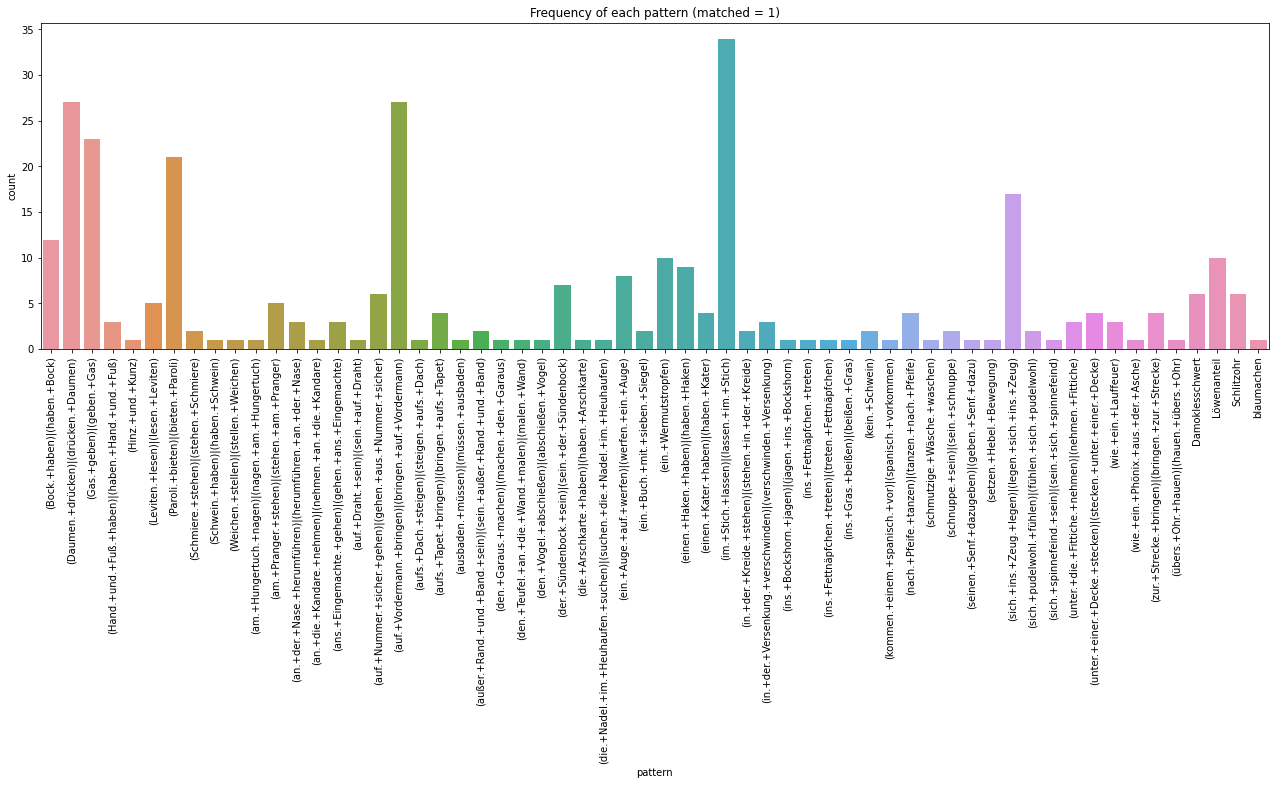

In [ ]:
### Frequency of each matched pattern ###

import matplotlib.pyplot as plt
import seaborn as sns
matched_pattern = result[result["match"]==1].groupby('pattern').size().reset_index(name = 'count')
#matched_pattern['pattern'].value_counts().plot(kind = 'bar')
#matched_pattern.plot(x='pattern', y='count', kind = 'bar')

plt.figure(figsize=(22, 6))
plt.xticks(rotation = 90)
sns.barplot(data=matched_pattern, x='pattern', y='count').set_title('Frequency of each pattern (matched = 1)')

In [ ]:
# 1st Try

result_1 = pd.read_csv('result_1.csv')
#result_1.to_csv('result_1.csv', index=False, encoding='utf8')

print("The number of matched sentences: ",len(result_1[result_1["match"]==1]))
result_1[result_1["match"]==1]

The number of matched sentences:  7


,pattern,sentence,match
1,(Gas.+geben)|(geben.+Gas),ab Herbst geben Audi in Sache Energiewende im ...,1
2,(Gas.+geben)|(geben.+Gas),""" als ich der Polizei sehen , geben ich in Pan...",1
4,(Gas.+geben)|(geben.+Gas),BMW wollen nach der Gewinnrückgang 2005 mehr G...,1
6,(Gas.+geben)|(geben.+Gas),der Bordcomputer übernehmen der Macht im Cockp...,1
8,(Gas.+geben)|(geben.+Gas),"ich überlegen ein Moment , dann tritt ich aufs...",1
11,(Daumen.+drücken)|(drücken.+Daumen),der haben etwa auf der Facebook-Seite der Unte...,1
17,(ins.+Fettnäpfchen.+treten)|(treten.+Fettnäpfc...,"Entschuldigung , Herr Professor , aber der Aus...",1


In [ ]:
# 2nd Try

result_2 = pd.read_csv('result_2.csv')
#result_2.to_csv('result_2.csv', index=False, encoding='utf8')

print("The number of matched sentences: ",len(result_2[result_2["match"]==1]))
result_2[result_2["match"]==1]

The number of matched sentences:  26


,pattern,sentence,match
15,(Bock.+haben)|(haben.+Bock),aber haben da irgendjemand morgens vor der Arb...,1
17,(Bock.+haben)|(haben.+Bock),der Film sein Programm : der CDU haben „ Bock ...,1
18,(Bock.+haben)|(haben.+Bock),Ein Argument der Kritiker : der sein doch all ...,1
19,(Bock.+haben)|(haben.+Bock),"Ich wollen gar nicht wissen , wie viel Mensch ...",1
25,(Gas.+geben)|(geben.+Gas),Bremen - ( mr ) · der Super-burschen “ haben T...,1
27,(Gas.+geben)|(geben.+Gas),der Keeper spielen im Feld und geben richtig G...,1
43,(Gas.+geben)|(geben.+Gas),Auch beim Gas geben ich vergleichsweise viel W...,1
47,(Gas.+geben)|(geben.+Gas),Auf der Bühne geben ich Gas wie DJ Ötzi und Mi...,1
49,(Gas.+geben)|(geben.+Gas),bis jetzt äusserte sich nur der Umfeld - und i...,1
70,(Gas.+geben)|(geben.+Gas),Furtwangen : Schönenbacher Sportwoche geben wi...,1


In [ ]:
# 3rd Try

result_3 = pd.read_csv('/content/content/My Drive/MasterArbeit/result_300K.csv')
#result_2.to_csv('result_2.csv', index=False, encoding='utf8')

print("The number of matched sentences: ",len(result_3[result_3["match"]==1]))
result_3[result_3["match"]==1]

The number of matched sentences:  81


,pattern,sentence,match
30,(Schwein.+haben)|(haben.+Schwein),""" Schwein haben ! "" , sagen man , weil man mit...",1
39,(Bock.+haben)|(haben.+Bock),Darum haben ich kein Bock auf Sarah und Pietro...,1
40,(Bock.+haben)|(haben.+Bock),"der Problem , dass man in der Mittelstufe kein...",1
46,(Bock.+haben)|(haben.+Bock),"Im Video : Eva , Steffi , Vanessa & Co. haben ...",1
47,(Bock.+haben)|(haben.+Bock),""" Irgendwann haben man kein Bock mehr """,1
...,...,...,...
243,(unter.+die.+Fittiche.+nehmen)|(nehmen.+Fittiche),"Gisele Bündchen , Winnie Harlow , Toni Garrn ,...",1
244,(unter.+die.+Fittiche.+nehmen)|(nehmen.+Fittiche),"Im Mittelfeld , im Zentrum und auf der Außenba...",1
247,(ins.+Fettnäpfchen.+treten),"Weil Abbott mit altbackenen Ansicht , vor alle...",1
249,(schmutzige.+Wäsche.+waschen),"Ich denken , schmutzige Wäsche in der Öffentli...",1


In [ ]:
# 4th Try

result_4 = pd.read_csv('/content/content/My Drive/MasterArbeit/result_4.csv')
#result_2.to_csv('result_2.csv', index=False, encoding='utf8')

print("The number of matched sentences: ",len(result_4[result_4["match"]==1]))
result_4[result_4["match"]==1]

The number of matched sentences:  70


,pattern,sentence,match
0,blaumachen,Einfach zwischendurch mal blaumachen gehen the...,1
1,Damoklesschwert,dass einen Damoklesschwert über sich schweben ...,1
2,Damoklesschwert,denn mit einer Mißtrauen der Nationalrat könne...,1
3,Damoklesschwert,und der Fragezeichen hinter dies Satz baumeln ...,1
4,Löwenanteil,der Löwenanteil der Geld stecken ich in Plakat...,1
...,...,...,...
79,(in.+der.+Versenkung.+verschwinden)|(verschwin...,"Großjung spielen für Velbert , ehe ich zu sein...",1
80,(in.+der.+Versenkung.+verschwinden)|(verschwin...,Möglicherweise auch wieder einen Julian Schaue...,1
83,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),Ich werden einen Auge auf mein Eltern werfen “...,1
84,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),Junglöwen-Ausbildungsleiter Wolfgang Schellenb...,1


In [ ]:
# 5th Try

result_5 = pd.read_csv('/content/content/My Drive/MasterArbeit/result_5.csv')
#result_2.to_csv('result_2.csv', index=False, encoding='utf8')

print("The number of matched sentences: ",len(result_5[result_5["match"]==1]))
result_5[result_5["match"]==1]

The number of matched sentences:  126


,pattern,sentence,match
0,Damoklesschwert,denn über der neu Kabinett hängen als Damokles...,1
1,Damoklesschwert,doch einen Damoklesschwert drohen über der Pfr...,1
2,Damoklesschwert,Unter der Damoklesschwert von Hartz IV haben B...,1
3,Löwenanteil,als Lieferant und Servicepartner für 4.700 Aut...,1
4,Löwenanteil,Banken und Versicherer verzichten im März auf ...,1
...,...,...,...
149,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),"Ein Triumph für Carsten Spohr , der schon lang...",1
150,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),Falschparker aufgepasst : Ordnungsamtsleiter F...,1
151,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),Papst Franziskus werfen einen waches Auge auf ...,1
152,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),"Ulrich Stephan , Chef-Anlagestratege der Deuts...",1


# 5. Make a Model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# 1 = sentences used idiomatically, 0 = sentences not used idiomatically, 2 = ambiguous sentences
result = pd.read_csv('/content/content/My Drive/MasterArbeit/result_0523.csv', encoding='utf8')
print("total idioms: {}\ntotal sentences: {}".format(len(idiom_list), len(joined_lemma)))
print("total matched idioms: {}".format(len(result[result["match"]==1].groupby('pattern').size())))
print('total matched sentences:',len(result))
print("sentences not used idiomatically:",len(result[result["match"]==0]))
print("sentences used idiomatically:",len(result[result["match"]==1]))
print("ambiguous sentences:",len(result[result["match"]==2]))
# result[result["match"]==1]["pattern"].nunique()
result[result["match"]==1]

total idioms: 285
total sentences: 440000
total matched idioms: 60
total matched sentences: 712
sentences not used idiomatically: 390
sentences used idiomatically: 310
ambiguous sentences: 12


,pattern,sentence,match
1,(Gas.+geben)|(geben.+Gas),ab Herbst geben Audi in Sache Energiewende im ...,1
2,(Gas.+geben)|(geben.+Gas),""" als ich der Polizei sehen , geben ich in Pan...",1
4,(Gas.+geben)|(geben.+Gas),BMW wollen nach der Gewinnrückgang 2005 mehr G...,1
6,(Gas.+geben)|(geben.+Gas),der Bordcomputer übernehmen der Macht im Cockp...,1
8,(Gas.+geben)|(geben.+Gas),"ich überlegen ein Moment , dann tritt ich aufs...",1
...,...,...,...
706,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),"Ein Triumph für Carsten Spohr , der schon lang...",1
707,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),Falschparker aufgepasst : Ordnungsamtsleiter F...,1
708,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),Papst Franziskus werfen einen waches Auge auf ...,1
709,(ein.+Auge.+auf.+werfen)|(werfen.+ein.+Auge),"Ulrich Stephan , Chef-Anlagestratege der Deuts...",1


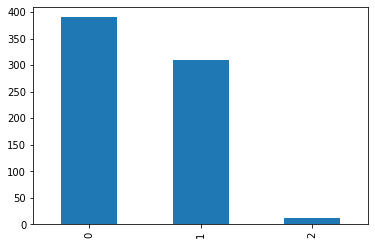

In [ ]:
### Distribution of labels ###
#matched_pattern = result[result["match"]==1].groupby('pattern').size().reset_index(name = 'count')
#matched_pattern['pattern'].value_counts().plot(kind = 'bar')
#matched_pattern.plot(x='pattern', y='count', kind = 'bar')

result['match'].value_counts().plot(kind = 'bar')

In [ ]:
#pattern_list = pd.read_csv('/content/content/My Drive/MasterArbeit/patterns.csv')['pattern'].tolist()
len(pattern_list)

301

In [ ]:
joined_lemma_copy = pd.read_csv('/content/content/My Drive/MasterArbeit/joined_lemma.csv').copy()
sentence = joined_lemma_copy['sentence'].tolist()
result_1_copy = pd.read_csv('/content/content/My Drive/MasterArbeit/result/result_1.csv').copy()
results = result_1_copy['sentence'].tolist()
idioms_copy = pd.read_csv('/content/content/My Drive/MasterArbeit/idioms.csv').copy()
results[0]

'Eine zum Himmel stinkend Schweinerei , der sich im November vergangen Jahr in der Gemarkung Thann ereignen haben , bleiben ungesühnt .'

In [ ]:
result_1_copy.head()
result_1_copy['idiom']

,pattern,sentence,match
0,(Schwein.+haben)|(haben.+Schwein),"Eine zum Himmel stinkend Schweinerei , der sic...",0
1,(Gas.+geben)|(geben.+Gas),ab Herbst geben Audi in Sache Energiewende im ...,1
2,(Gas.+geben)|(geben.+Gas),""" als ich der Polizei sehen , geben ich in Pan...",1
3,(Gas.+geben)|(geben.+Gas),Auch in der Gastronomie mögen Willmann mein Wü...,0
4,(Gas.+geben)|(geben.+Gas),BMW wollen nach der Gewinnrückgang 2005 mehr G...,1


In [ ]:
# import re
# re.findall(r'', sentence[0])
idioms_copy
#joined_lemma_copy['idiom']

for i, sent in enumerate(sentence):
    if sent==result_1_copy['sentence'].tolist()[0]:
        print(i, sent)
        print(results[0])
#        sentence['idiom'] = result_1_copy['pattern'].tolist()[0]


result_1_copy['pattern'].tolist()[0]
result_1_copy['match'].tolist()[0]

4398 Eine zum Himmel stinkend Schweinerei , der sich im November vergangen Jahr in der Gemarkung Thann ereignen haben , bleiben ungesühnt .
Eine zum Himmel stinkend Schweinerei , der sich im November vergangen Jahr in der Gemarkung Thann ereignen haben , bleiben ungesühnt .


0